<a href="https://colab.research.google.com/github/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./blob/main/Main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression experiments

## Experiments with dataset with statistical values for the whole jumbo

Dataset describes the orders of each run using statistical values like:

1.   Number of orders
2.   Number of Distinct widths (orders)
3.   Maximum width of run
4.   Minimum width of run
5.   Average width of orders
6.   Number of reels requested from each order (Average bettween the actual and the upper/over tolerances)
7.   Total waste percentage of solution



###Data visualization and preprocessing


Import pre-required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('darkgrid')
cmap = sns.cm.mako_r
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [3]:
dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/StatisticalDataset.csv'

In [4]:
runs = pd.read_csv(dataset_url, sep=';')

Describe data

In [5]:
runs.head()

Run number  Max width  Min width  Number of orders  Average reel width  \
0         702       4900        800                57         3242.105263   
1         704       4900        500                51         2752.941176   
2         706       4900        700                60         3210.000000   
3         713       4100       1200                21         2914.285714   
4         715       4400       1300                33         2681.818182   

   Deviation of widths  Number of ordered reels  Weighted average width  \
0          1258.109036               442.910547             2709.066292   
1          1458.677886               432.623483             2574.588114   
2          1378.245015               380.490872             3314.418176   
3           983.506845               218.253272             2974.281246   
4           990.092971               224.999823             2674.563460   

   Total waste percentage  
0                2.303394  
1                0.086580  
2               13.841169  
3                3.244852  
4                2.160682

In [6]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Run number               350 non-null    int64  
 1   Max width                350 non-null    int64  
 2   Min width                350 non-null    int64  
 3   Number of orders         350 non-null    int64  
 4   Average reel width       350 non-null    float64
 5   Deviation of widths      350 non-null    float64
 6   Number of ordered reels  350 non-null    float64
 7   Weighted average width   350 non-null    float64
 8   Total waste percentage   350 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 24.7 KB


In [7]:
runs.drop(columns=['Run number']).describe()

Max width    Min width  Number of orders  Average reel width  \
count   350.000000   350.000000        350.000000          350.000000   
mean   4784.285714   685.142857        125.217143         2621.954786   
std     296.510612   302.722806         73.234394          505.296338   
min    3500.000000   500.000000         18.000000         1316.666667   
25%    4700.000000   500.000000         60.000000         2241.059177   
50%    4900.000000   600.000000        114.000000         2667.361111   
75%    5000.000000   700.000000        165.000000         2987.915601   
max    5000.000000  2000.000000        410.000000         3750.000000   

       Deviation of widths  Number of ordered reels  Weighted average width  \
count           350.000000               350.000000              350.000000   
mean           1123.796772               961.450360             2616.490235   
std             200.415014               548.372558              510.074808   
min             566.140182               124.279789             1197.284257   
25%             999.407227               477.061014             2259.961976   
50%            1121.620787               883.492874             2664.115687   
75%            1267.400439              1281.280903             2960.876574   
max            1644.779480              2581.498497             3933.297689   

       Total waste percentage  
count              350.000000  
mean                 1.726614  
std                  2.622997  
min                  0.000000  
25%                  0.316456  
50%                  0.940091  
75%                  1.632503  
max                 23.419755

In [8]:
runs = runs.fillna(0)

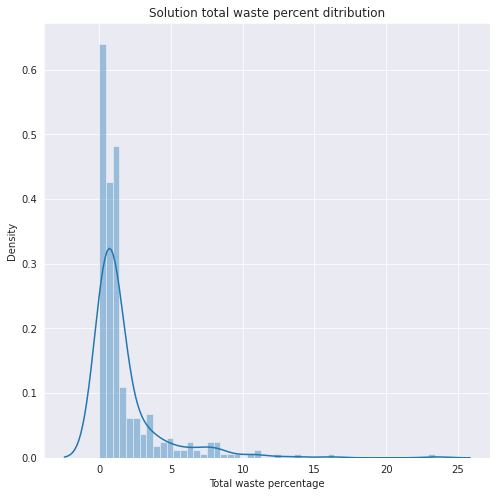

In [9]:
plt.figure(figsize=(8,8))

plt.title('Solution total waste percent ditribution')
sns.distplot(runs['Total waste percentage'])

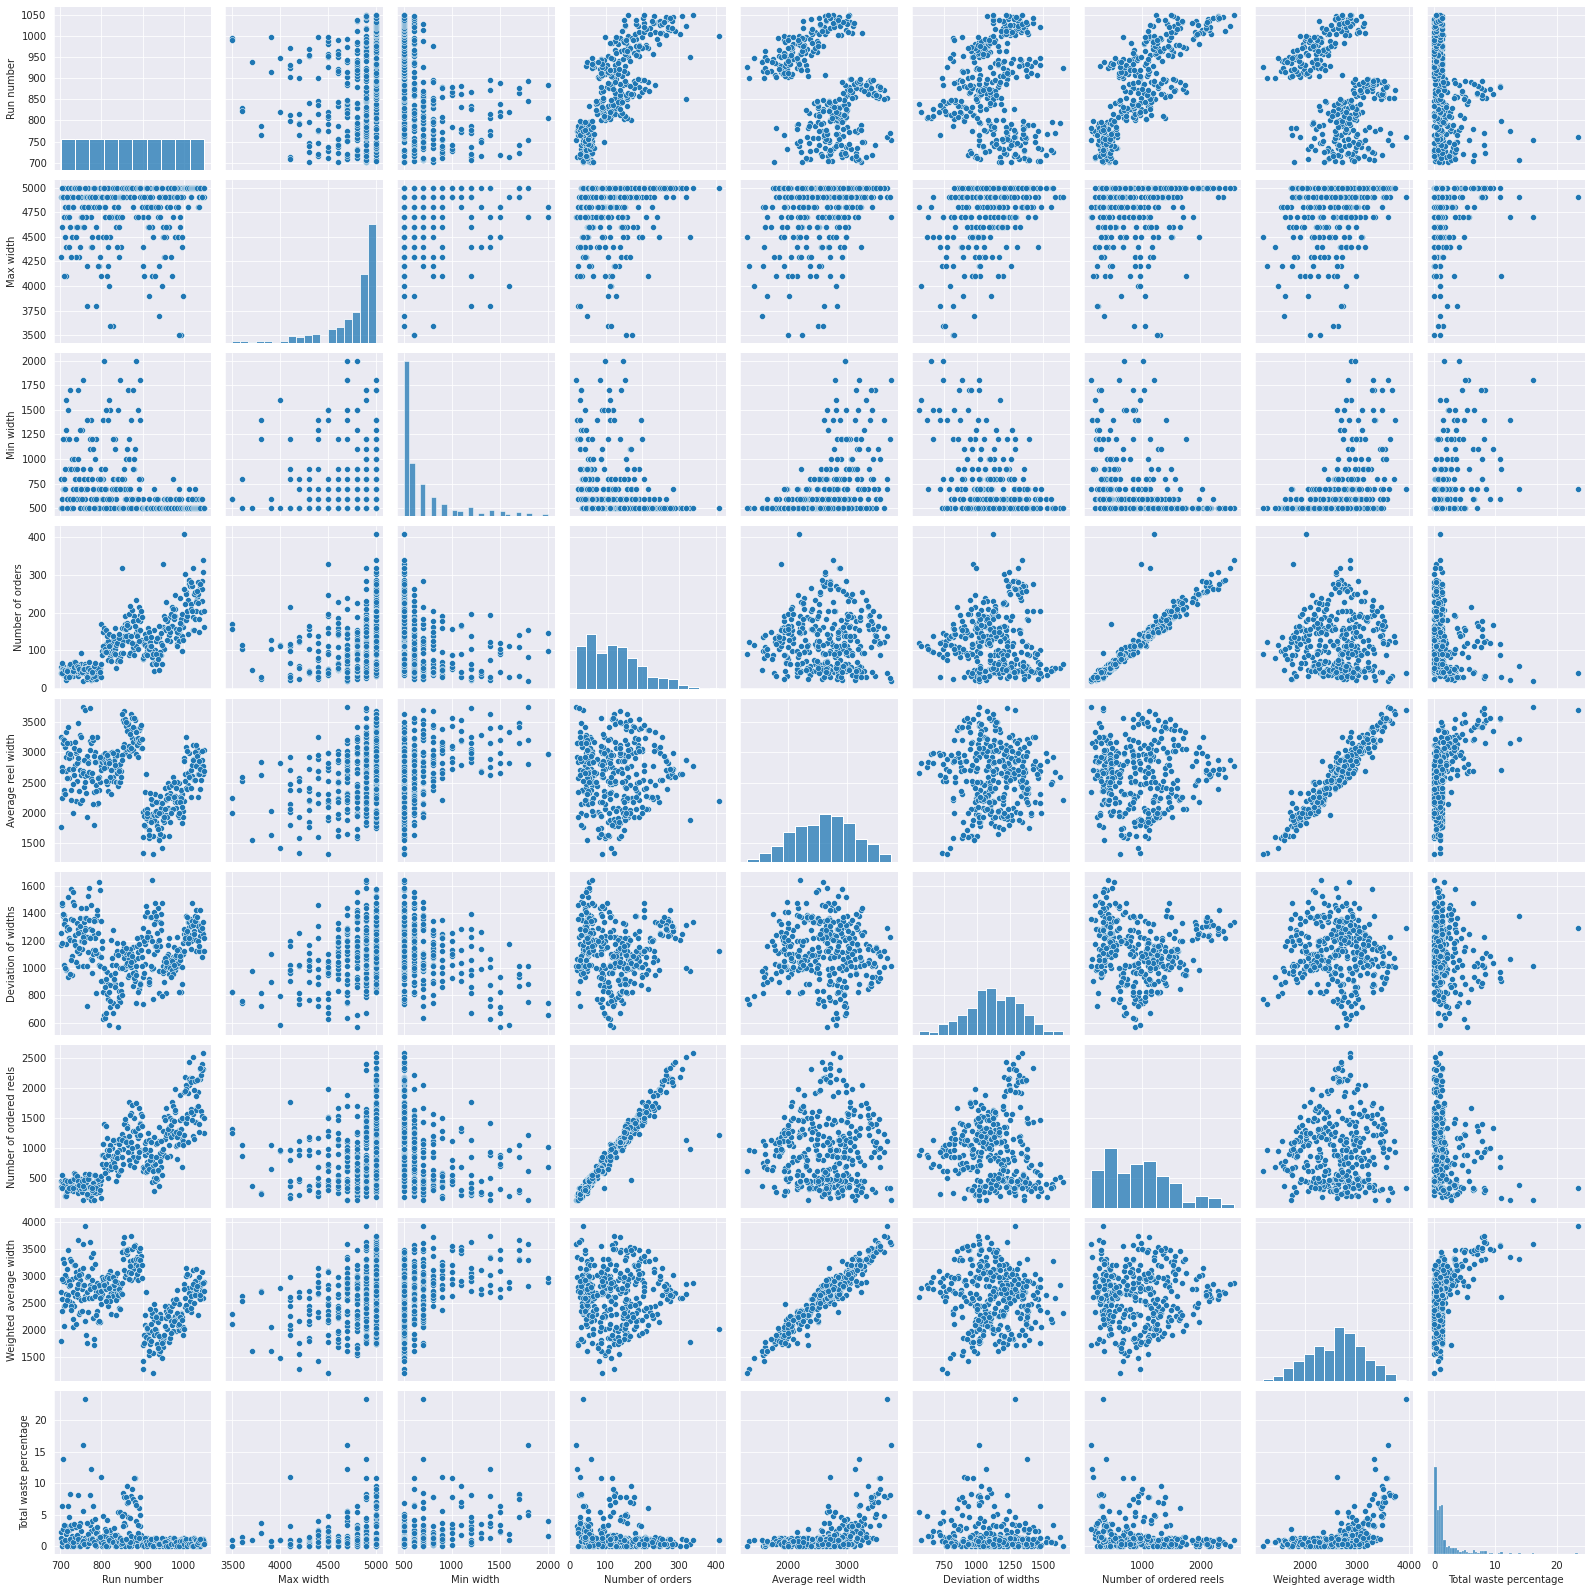

In [10]:
ax = sns.pairplot(runs[runs.columns])

In [11]:
def plot_corr_matrix(datast):
    corrMatrix = datast.corr()
    plt.figure(figsize=(35,15))
    sns.heatmap(corrMatrix, annot=True)
    plt.show()
    

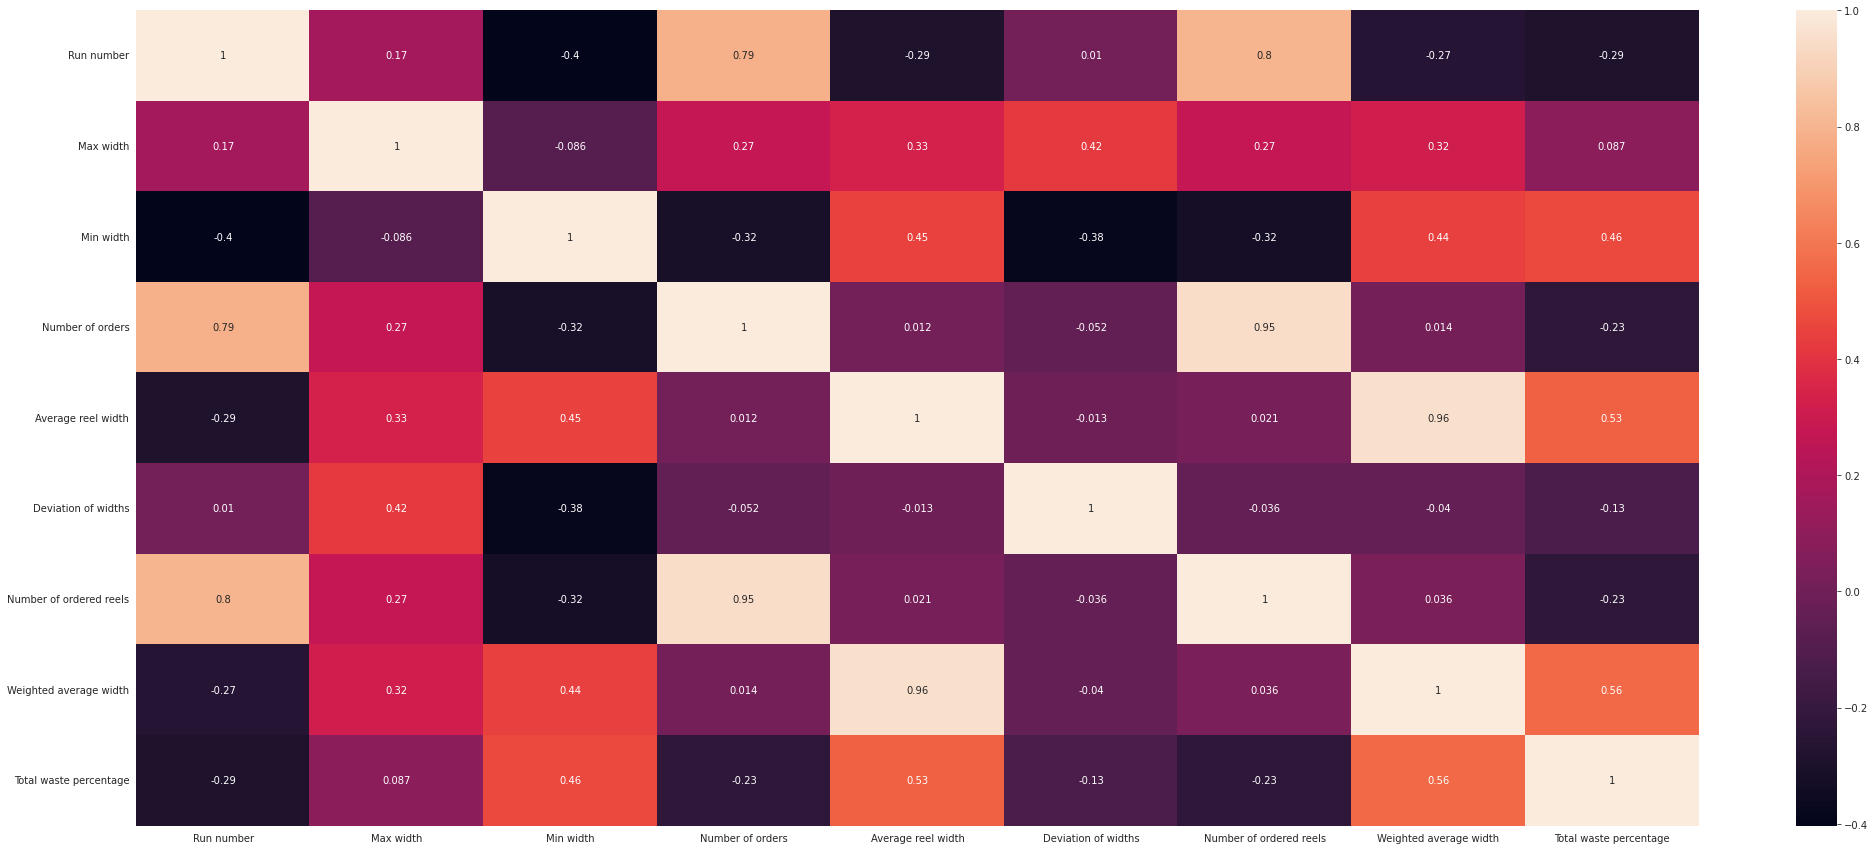

In [ ]:
plot_corr_matrix(runs)

We see that average number of reels is highly correlated with number of orders.

### Regression experiments

In [12]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['Run number', 'Total waste percentage', 'Number of orders'])
y = runs['Total waste percentage']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [14]:
from sklearn import metrics
def regression_model_metrics(y_test, y_pred):
  return metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [15]:
def get_model_prediction_time(model, x_to_test):
  start = datetime.now()
  prd = model.predict(x_to_test)
  end = datetime.now()
  time_difference = (end-start).total_seconds()
  return time_difference/len(x_to_test)

In [16]:
def test_regression_model(model, l_x_train, l_x_test, l_y_train, l_y_test):
  model.fit(l_x_train, l_y_train)
  prediction_time = get_model_prediction_time(model, l_x_test)
  mean_absolute_error, mean_squared_error, root_mean_square_error = regression_model_metrics(l_y_test, model.predict(l_x_test))
  return mean_absolute_error, mean_squared_error, root_mean_square_error, prediction_time

In [17]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import PolynomialFeatures

def test_regression_models(l_x_train, l_x_test, l_y_train, l_y_test):
  names_list = []
  mean_absolute_error_list = []
  mean_square_error_list = []
  root_mean_square_error_list = []
  prediction_time_list = []

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('Linear regression')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)


  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(SGDRegressor(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('SGD regressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)
  
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(ElasticNet(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('ElasticNet')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(BayesianRidge(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('BayesianRidge')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(RandomForestRegressor(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('RandomForestRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(DecisionTreeRegressor(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('DecisionTreeRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(XGBRFRegressor(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('XGBRFRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  poly_reg = PolynomialFeatures(degree=2)
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), poly_reg.fit_transform(l_x_train), poly_reg.transform(l_x_test), l_y_train, l_y_test)
  names_list.append('Polynomial regression 2nd degree')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)
  
  poly_reg = PolynomialFeatures(degree=3)
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), poly_reg.fit_transform(l_x_train), poly_reg.transform(l_x_test), l_y_train, l_y_test)
  names_list.append('Polynomial regression 3nd degree')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  # initialize data of lists.
  data = {'Model name':names_list,
          'Mean absolute error':mean_absolute_error_list,
          'Mean square error':mean_square_error_list,
          'Root mean square error':root_mean_square_error_list,
          'Prediction time (s)': prediction_time_list
          }
  return pd.DataFrame.from_dict(data).sort_values(by=['Mean absolute error'])


In [18]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[19:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [19]:
results

Model name  Mean absolute error  Mean square error  \
6                    XGBRFRegressor         8.089264e-01       1.578622e+00   
4             RandomForestRegressor         8.130318e-01       1.897504e+00   
7  Polynomial regression 2nd degree         9.888293e-01       1.611056e+00   
8  Polynomial regression 3nd degree         1.079345e+00       3.695037e+00   
5             DecisionTreeRegressor         1.123141e+00       5.152216e+00   
3                     BayesianRidge         1.401396e+00       3.470298e+00   
0                 Linear regression         1.420224e+00       3.509947e+00   
2                        ElasticNet         1.420316e+00       3.509312e+00   
1                     SGD regressor         1.109537e+16       1.501366e+32   

   Root mean square error  Prediction time (s)  
6            1.256432e+00             0.000017  
4            1.377499e+00             0.000129  
7            1.269274e+00             0.000002  
8            1.922248e+00             0.000003  
5            2.269849e+00             0.000015  
3            1.862873e+00             0.000017  
0            1.873485e+00             0.000022  
2            1.873316e+00             0.000017  
1            1.225303e+16             0.000016

## Experiments with dataset with statistical values for the every jumbo n/10 of the input

Dataset describes the orders of each run using statistical values like:

1.   Number of orders
2.   Number of Distinct widths (orders)
3.   Maximum width of run
4.   Minimum width of run
5.   Average width of orders
6.   Number of reels requested from each order (Average bettween the actual and the upper/over tolerances)
7.   Total waste percentage of solution

###Data visualization and preprocessing


In [20]:
extended_dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/ExtendedStatisticalDataset.csv'

In [21]:
extended_runs = pd.read_csv(extended_dataset_url, sep=';')

In [22]:
extended_runs.head()

Run number  Max width  Min width  Number of orders  Average reel width  \
0         701       4300        500                 8         1769.230769   
1         702       4900        800                16         3242.105263   
2         703       4600        500                17         2240.909091   
3         704       4900        500                14         2752.941176   
4         705       5000        600                11         2684.615385   

   Deviation of widths  Number of orders 1  Number of orders 2  \
0          1197.486684                   3                   3   
1          1281.195531                   0                   2   
2          1202.639593                   2                   3   
3          1488.756884                   2                   1   
4          1512.639059                   1                   1   

   Number of orders 3  Number of orders 4  ...  Max width 2  Max width 3  \
0                   3                   1  ...       1200.0       1900.0   
1                   1                   4  ...       1200.0       1600.0   
2                   4                   5  ...       1000.0       1900.0   
3                   4                   0  ...        900.0       1800.0   
4                   4                   1  ...       1200.0       1700.0   

   Max width 4  Max width 5  Max width 6  Max width 7  Max width 8  \
0       2400.0       2600.0       3500.0       4300.0          NaN   
1       2500.0       3000.0       3700.0       4400.0       4900.0   
2       2400.0       2900.0          NaN       4200.0       4600.0   
3          NaN       2900.0       3400.0       4000.0       4900.0   
4       2500.0       3000.0          NaN       3900.0       5000.0   

   Max width 9  Max width 10  Total waste percentage  
0          NaN           NaN                1.253918  
1          NaN           NaN                2.303394  
2          NaN           NaN                0.751089  
3          NaN           NaN                0.086580  
4          NaN           NaN                6.347962  

[5 rows x 77 columns]

In [23]:
extended_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Run number                  350 non-null    int64  
 1   Max width                   350 non-null    int64  
 2   Min width                   350 non-null    int64  
 3   Number of orders            350 non-null    int64  
 4   Average reel width          350 non-null    float64
 5   Deviation of widths         350 non-null    float64
 6   Number of orders 1          350 non-null    int64  
 7   Number of orders 2          350 non-null    int64  
 8   Number of orders 3          350 non-null    int64  
 9   Number of orders 4          350 non-null    int64  
 10  Number of orders 5          350 non-null    int64  
 11  Number of orders 6          350 non-null    int64  
 12  Number of orders 7          350 non-null    int64  
 13  Number of orders 8          350 non

In [24]:
extended_runs.drop(columns=['Run number']).describe()

Max width    Min width  Number of orders  Average reel width  \
count   350.000000   350.000000        350.000000          350.000000   
mean   4782.857143   685.428571         22.685714         2619.279596   
std     296.382888   302.594728          8.678503          506.839107   
min    3500.000000   500.000000          6.000000         1316.666667   
25%    4700.000000   500.000000         16.000000         2241.059177   
50%    4900.000000   600.000000         22.000000         2662.500000   
75%    5000.000000   700.000000         29.000000         2987.915601   
max    5000.000000  2000.000000         43.000000         3750.000000   

       Deviation of widths  Number of orders 1  Number of orders 2  \
count           350.000000          350.000000          350.000000   
mean           1138.799578            1.725714            5.180000   
std             206.641380            1.858666            4.557075   
min             570.958483            0.000000            0.000000   
25%            1012.407856            0.000000            1.000000   
50%            1135.543819            1.000000            3.000000   
75%            1282.433692            3.000000            8.000000   
max            1671.967760            8.000000           20.000000   

       Number of orders 3  Number of orders 4  Number of orders 5  ...  \
count          350.000000          350.000000          350.000000  ...   
mean             5.822857            7.480000            6.628571  ...   
std              5.569312            5.254377            5.239730  ...   
min              0.000000            0.000000            0.000000  ...   
25%              1.000000            3.000000            2.000000  ...   
50%              4.000000            7.000000            5.000000  ...   
75%             10.000000           11.000000           11.000000  ...   
max             21.000000           22.000000           22.000000  ...   

       Max width 2  Max width 3  Max width 4  Max width 5  Max width 6  \
count   314.000000   312.000000   339.000000   329.000000   330.000000   
mean   1114.649682  1772.756410  2416.224189  3069.604863  3655.151515   
std     150.532722   156.719069   146.363887   141.378758   157.451613   
min     700.000000  1300.000000  1900.000000  2600.000000  3200.000000   
25%    1100.000000  1700.000000  2400.000000  3000.000000  3500.000000   
50%    1200.000000  1800.000000  2500.000000  3100.000000  3700.000000   
75%    1200.000000  1900.000000  2500.000000  3200.000000  3800.000000   
max    1300.000000  1900.000000  2600.000000  3200.000000  3900.000000   

       Max width 7  Max width 8  Max width 9  Max width 10  \
count   307.000000   301.000000          0.0           0.0   
mean   4300.325733  4882.059801          NaN           NaN   
std     167.936023   141.222318          NaN           NaN   
min    3800.000000  4500.000000          NaN           NaN   
25%    4200.000000  4800.000000          NaN           NaN   
50%    4300.000000  4900.000000          NaN           NaN   
75%    4400.000000  5000.000000          NaN           NaN   
max    4500.000000  5000.000000          NaN           NaN   

       Total waste percentage  
count              350.000000  
mean                 1.726614  
std                  2.622997  
min                  0.000000  
25%                  0.316456  
50%                  0.940091  
75%                  1.632503  
max                 23.419755  

[8 rows x 76 columns]

In [25]:
extended_runs = extended_runs.fillna(0)

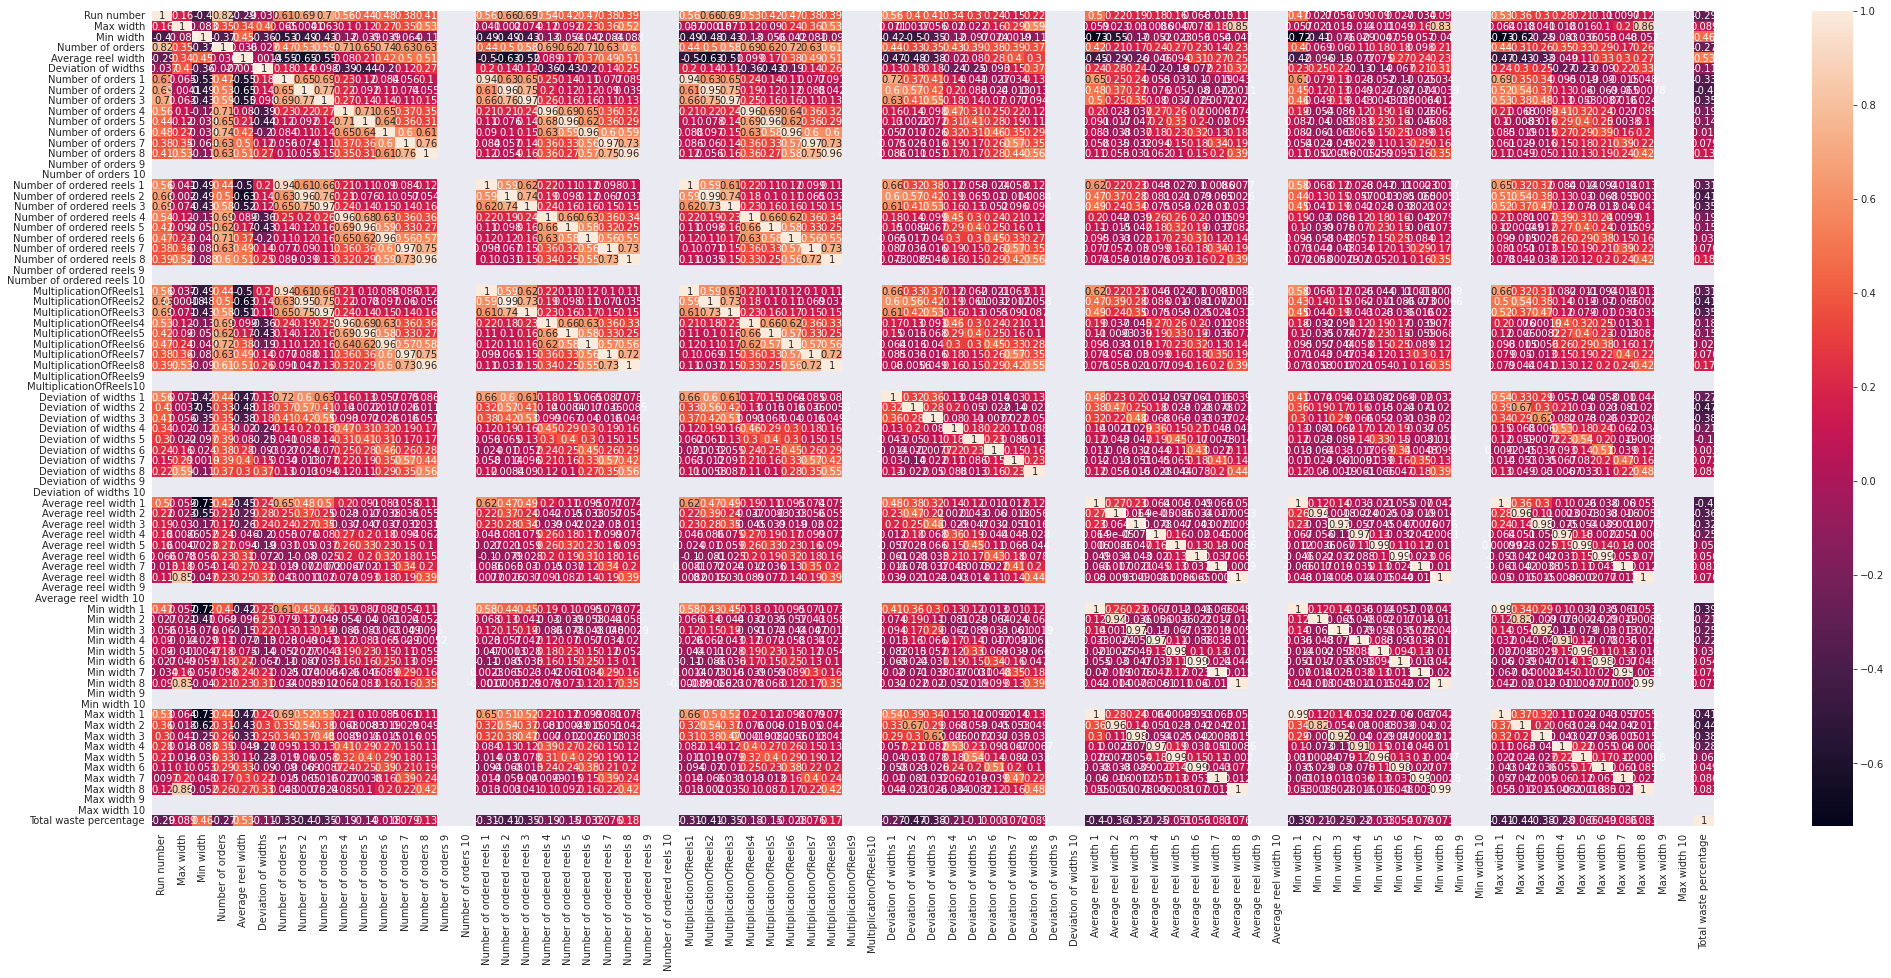

In [26]:
plot_corr_matrix(extended_runs)

### Regression experiments

In [27]:
# Splitting into features and value to be predicted
X = extended_runs.drop(columns=['Run number', 'Total waste percentage'])
y = extended_runs['Total waste percentage']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [29]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[19:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
results

Model name  Mean absolute error  Mean square error  \
4             RandomForestRegressor         1.260713e+00       6.928507e+00   
5             DecisionTreeRegressor         1.283318e+00       6.596954e+00   
6                    XGBRFRegressor         1.365836e+00       8.465902e+00   
0                 Linear regression         1.471781e+00       7.284947e+00   
2                        ElasticNet         1.484105e+00       7.711098e+00   
3                     BayesianRidge         1.540684e+00       8.768153e+00   
7  Polynomial regression 2nd degree         4.314425e+00       3.179445e+01   
8  Polynomial regression 3nd degree         7.924029e+00       1.559776e+02   
1                     SGD regressor         3.810777e+20       2.934011e+41   

   Root mean square error  Prediction time (s)  
4            2.632206e+00             0.000176  
5            2.568454e+00             0.000021  
6            2.909622e+00             0.000027  
0            2.699064e+00             0.000044  
2            2.776886e+00             0.000040  
3            2.961107e+00             0.000035  
7            5.638657e+00             0.000066  
8            1.248910e+01             0.000112  
1            5.416651e+20             0.000107

# Classification experiments

Define classes method

In [31]:
def classification_condition(row):
  total_waste_value = row['Total waste percentage']
  if total_waste_value < 1:
    return 0
  if total_waste_value < 2:
    return 1
  return 2

## Classification experiments with dataset with statistical values for the whole jumbo

In [32]:
runs['Class'] = runs.apply (lambda row: classification_condition(row), axis=1)

### Experiments with original data

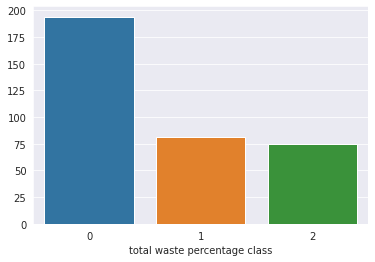

In [33]:
# Checking if Data is balanced
xs = runs['Class'].value_counts().index
ys = runs['Class'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("total waste percentage class")
plt.show()

Define methods:

*   Print metrics
*   Test model



In [34]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

def print_metrics(actual, prediction, model, x_test, y_test):
  print(f"Accuracy Score : {round(accuracy_score(actual, prediction) * 100, 2)}%")
  print(classification_report(actual, prediction))
  plot_confusion_matrix(model, x_test, y_test, cmap=cmap)
  plt.grid(False)
  plt.show()

In [35]:
def test_model(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)
  preds = model.predict(xtest)
  print_metrics(ytest, preds, model, xtest, ytest)

In [36]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['Run number', 'Total waste percentage', 'Class'])
y = runs['Class']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [39]:
def test_classification_models(l_x_train, l_x_test, l_y_train, l_y_test):
  print('Logistic regression')
  print('--------------------')
  print('--------------------')
  log_reg = LogisticRegression()
  test_model(log_reg, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Gaussian NB')
  print('--------------------')
  print('--------------------')
  nb = GaussianNB()
  test_model(nb, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Random forest classifier')
  print('--------------------')
  print('--------------------')
  rf = RandomForestClassifier()
  test_model(rf, l_x_train, l_y_train, l_x_test, l_y_test)
  print('XGB classifier')
  print('--------------------')
  print('--------------------')
  xgb = XGBClassifier()
  test_model(xgb, l_x_train, l_y_train, l_x_test, l_y_test)
  print('K neighbors')
  print('--------------------')
  print('--------------------')
  knn = KNeighborsClassifier()
  test_model(knn, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Decision tree classifier')
  print('--------------------')
  print('--------------------')
  dt = DecisionTreeClassifier()
  test_model(dt, l_x_train, l_y_train, l_x_test, l_y_test)
  print('SVM')
  print('--------------------')
  print('--------------------')
  svc =  SVC()
  test_model(svc, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Linear discriminant analysis')
  print('--------------------')
  print('--------------------')
  linear_disc = LinearDiscriminantAnalysis()
  test_model(linear_disc, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Decision tree classifier')
  print('--------------------')
  print('--------------------')
  decision_trees = DecisionTreeClassifier()
  test_model(linear_disc, l_x_train, l_y_train, l_x_test, l_y_test)

Logistic regression
--------------------
--------------------
Accuracy Score : 67.14%
              precision    recall  f1-score   support

           0       0.67      0.94      0.78        36
           1       0.50      0.05      0.09        20
           2       0.71      0.86      0.77        14

    accuracy                           0.67        70
   macro avg       0.62      0.62      0.55        70
weighted avg       0.63      0.67      0.58        70



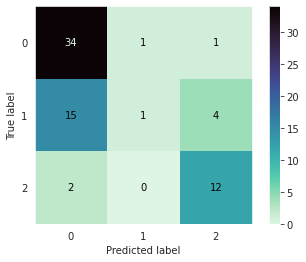

Gaussian NB
--------------------
--------------------
Accuracy Score : 61.43%
              precision    recall  f1-score   support

           0       0.62      0.86      0.72        36
           1       0.29      0.10      0.15        20
           2       0.77      0.71      0.74        14

    accuracy                           0.61        70
   macro avg       0.56      0.56      0.54        70
weighted avg       0.55      0.61      0.56        70



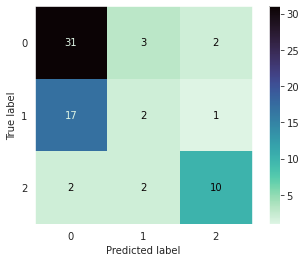

Random forest classifier
--------------------
--------------------
Accuracy Score : 65.71%
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        36
           1       0.67      0.10      0.17        20
           2       0.73      0.79      0.76        14

    accuracy                           0.66        70
   macro avg       0.68      0.60      0.56        70
weighted avg       0.66      0.66      0.59        70



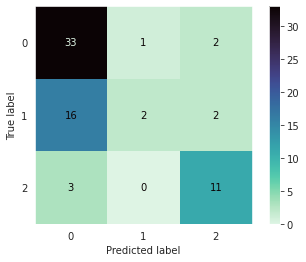

XGB classifier
--------------------
--------------------
Accuracy Score : 64.29%
              precision    recall  f1-score   support

           0       0.62      0.92      0.74        36
           1       0.25      0.05      0.08        20
           2       0.85      0.79      0.81        14

    accuracy                           0.64        70
   macro avg       0.57      0.58      0.55        70
weighted avg       0.56      0.64      0.57        70



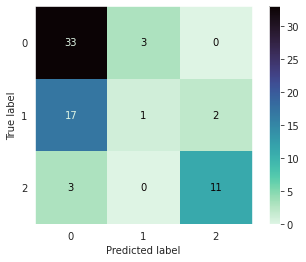

K neighbors
--------------------
--------------------
Accuracy Score : 65.71%
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        36
           1       0.50      0.20      0.29        20
           2       0.90      0.64      0.75        14

    accuracy                           0.66        70
   macro avg       0.68      0.59      0.60        70
weighted avg       0.65      0.66      0.62        70



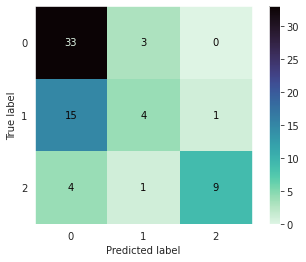

Decision tree classifier
--------------------
--------------------
Accuracy Score : 61.43%
              precision    recall  f1-score   support

           0       0.62      0.81      0.70        36
           1       0.40      0.20      0.27        20
           2       0.77      0.71      0.74        14

    accuracy                           0.61        70
   macro avg       0.60      0.57      0.57        70
weighted avg       0.59      0.61      0.58        70



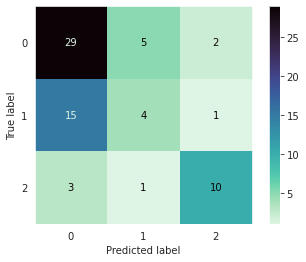

SVM
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.61      0.94      0.74        36
           1       0.00      0.00      0.00        20
           2       0.71      0.71      0.71        14

    accuracy                           0.63        70
   macro avg       0.44      0.55      0.48        70
weighted avg       0.46      0.63      0.52        70



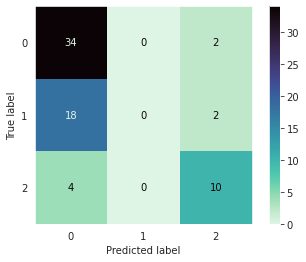

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        36
           1       0.25      0.05      0.08        20
           2       0.71      0.71      0.71        14

    accuracy                           0.63        70
   macro avg       0.53      0.56      0.52        70
weighted avg       0.54      0.63      0.55        70



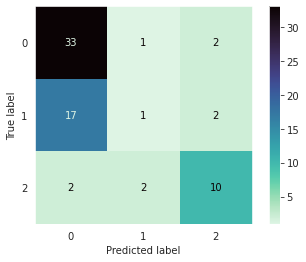

Decision tree classifier
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        36
           1       0.25      0.05      0.08        20
           2       0.71      0.71      0.71        14

    accuracy                           0.63        70
   macro avg       0.53      0.56      0.52        70
weighted avg       0.54      0.63      0.55        70



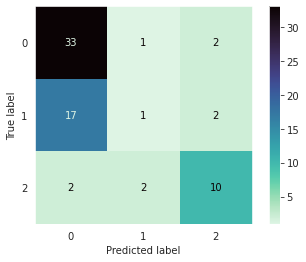

In [40]:
test_classification_models(X_train, X_test, y_train, y_test)

### Experiments with oversampled data


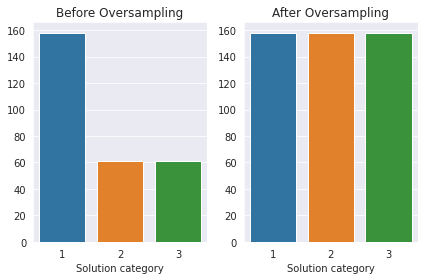

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['1', '2', '3'], y =[sum(y_train == 0), sum(y_train == 1), sum(y_train == 2)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Solution category')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X_train, y_train) 

sns.barplot(x=['1', '2', '3'], y =[sum(y_oversampled == 0), sum(y_oversampled == 1), sum(y_oversampled == 2)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Solution category')

plt.tight_layout()
plt.show()

Logistic regression
--------------------
--------------------
Accuracy Score : 55.71%
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        36
           1       0.25      0.20      0.22        20
           2       0.63      0.86      0.73        14

    accuracy                           0.56        70
   macro avg       0.51      0.57      0.53        70
weighted avg       0.54      0.56      0.54        70



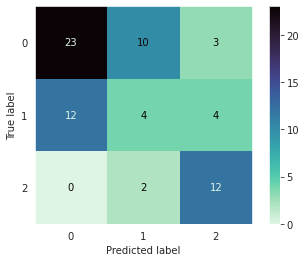

Gaussian NB
--------------------
--------------------
Accuracy Score : 51.43%
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        36
           1       0.14      0.10      0.12        20
           2       0.71      0.71      0.71        14

    accuracy                           0.51        70
   macro avg       0.48      0.49      0.48        70
weighted avg       0.48      0.51      0.49        70



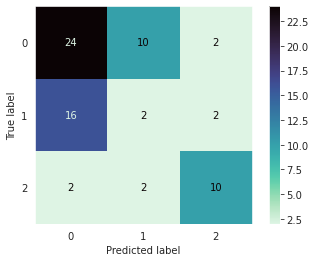

Random forest classifier
--------------------
--------------------
Accuracy Score : 61.43%
              precision    recall  f1-score   support

           0       0.62      0.81      0.70        36
           1       0.36      0.20      0.26        20
           2       0.83      0.71      0.77        14

    accuracy                           0.61        70
   macro avg       0.60      0.57      0.58        70
weighted avg       0.59      0.61      0.59        70



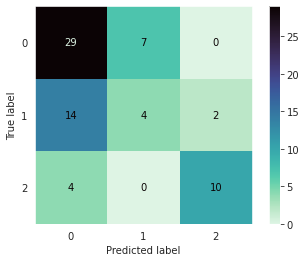

XGB classifier
--------------------
--------------------
Accuracy Score : 64.29%
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        36
           1       0.41      0.35      0.38        20
           2       0.85      0.79      0.81        14

    accuracy                           0.64        70
   macro avg       0.64      0.63      0.63        70
weighted avg       0.63      0.64      0.64        70



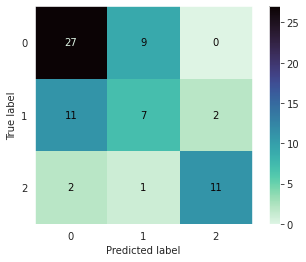

K neighbors
--------------------
--------------------
Accuracy Score : 57.14%
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        36
           1       0.31      0.25      0.28        20
           2       0.77      0.71      0.74        14

    accuracy                           0.57        70
   macro avg       0.56      0.55      0.56        70
weighted avg       0.56      0.57      0.56        70



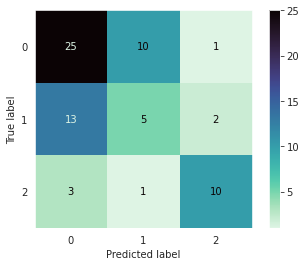

Decision tree classifier
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.65      0.78      0.71        36
           1       0.43      0.30      0.35        20
           2       0.77      0.71      0.74        14

    accuracy                           0.63        70
   macro avg       0.62      0.60      0.60        70
weighted avg       0.61      0.63      0.61        70



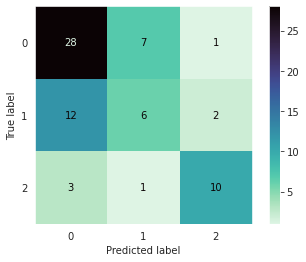

SVM
--------------------
--------------------
Accuracy Score : 54.29%
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        36
           1       0.24      0.20      0.22        20
           2       0.71      0.86      0.77        14

    accuracy                           0.54        70
   macro avg       0.52      0.56      0.53        70
weighted avg       0.52      0.54      0.53        70



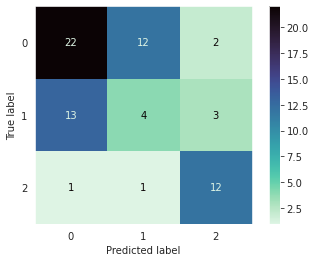

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 55.71%
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        36
           1       0.24      0.20      0.22        20
           2       0.75      0.86      0.80        14

    accuracy                           0.56        70
   macro avg       0.54      0.57      0.55        70
weighted avg       0.54      0.56      0.55        70



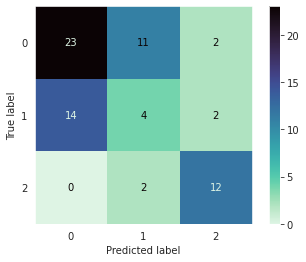

Decision tree classifier
--------------------
--------------------
Accuracy Score : 55.71%
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        36
           1       0.24      0.20      0.22        20
           2       0.75      0.86      0.80        14

    accuracy                           0.56        70
   macro avg       0.54      0.57      0.55        70
weighted avg       0.54      0.56      0.55        70



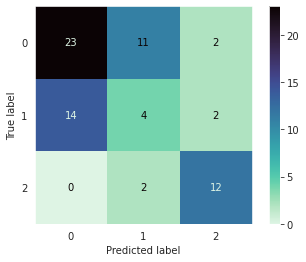

In [43]:
test_classification_models(X_oversampled, X_test, y_oversampled, y_test)

## Classification experiments with dataset with statistical values for the every jumbo n/10 of the input

### Experiments with original data

In [ ]:
extended_runs['Class'] = extended_runs.apply (lambda row: classification_condition(row), axis=1)

In [ ]:
# Splitting into features and value to be predicted
X = extended_runs.drop(columns=['Run number', 'Total waste percentage', 'Class'])
y = extended_runs['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 74.29%
              precision    recall  f1-score   support

           0       0.76      0.97      0.86        40
           1       0.00      0.00      0.00        15
           2       0.68      0.87      0.76        15

    accuracy                           0.74        70
   macro avg       0.48      0.61      0.54        70
weighted avg       0.58      0.74      0.65        70



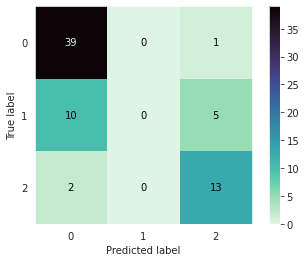

Gaussian NB
--------------------
--------------------
Accuracy Score : 57.14%
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        40
           1       0.08      0.07      0.07        15
           2       0.50      0.80      0.62        15

    accuracy                           0.57        70
   macro avg       0.46      0.51      0.47        70
weighted avg       0.58      0.57      0.56        70



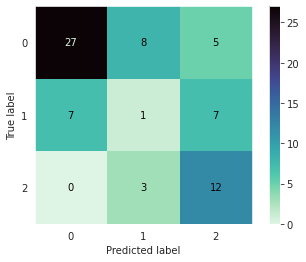

Random forest classifier
--------------------
--------------------
Accuracy Score : 71.43%
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        40
           1       0.00      0.00      0.00        15
           2       0.64      0.93      0.76        15

    accuracy                           0.71        70
   macro avg       0.48      0.61      0.53        70
weighted avg       0.59      0.71      0.65        70



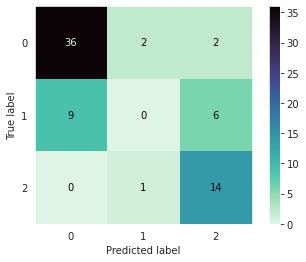

XGB classifier
--------------------
--------------------
Accuracy Score : 77.14%
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        40
           1       0.60      0.20      0.30        15
           2       0.64      0.93      0.76        15

    accuracy                           0.77        70
   macro avg       0.70      0.69      0.65        70
weighted avg       0.76      0.77      0.74        70



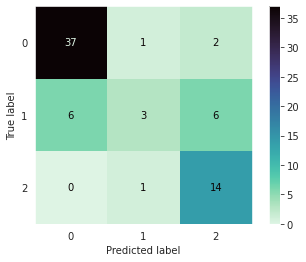

K neighbors
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.68      0.90      0.77        40
           1       0.25      0.13      0.17        15
           2       0.67      0.40      0.50        15

    accuracy                           0.63        70
   macro avg       0.53      0.48      0.48        70
weighted avg       0.58      0.63      0.59        70



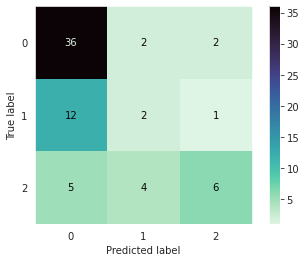

Decision tree classifier
--------------------
--------------------
Accuracy Score : 60.0%
              precision    recall  f1-score   support

           0       0.74      0.57      0.65        40
           1       0.30      0.40      0.34        15
           2       0.68      0.87      0.76        15

    accuracy                           0.60        70
   macro avg       0.58      0.61      0.59        70
weighted avg       0.63      0.60      0.61        70



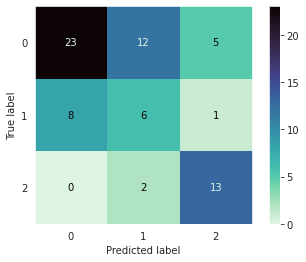

SVM
--------------------
--------------------
Accuracy Score : 64.29%
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        40
           1       0.00      0.00      0.00        15
           2       0.83      0.33      0.48        15

    accuracy                           0.64        70
   macro avg       0.49      0.44      0.42        70
weighted avg       0.54      0.64      0.54        70



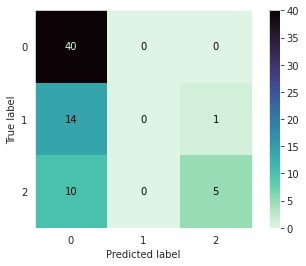

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 61.43%
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        40
           1       0.15      0.13      0.14        15
           2       0.65      0.73      0.69        15

    accuracy                           0.61        70
   macro avg       0.52      0.54      0.53        70
weighted avg       0.60      0.61      0.61        70



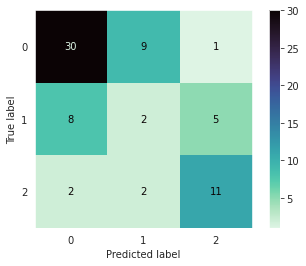

Decision tree classifier
--------------------
--------------------
Accuracy Score : 61.43%
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        40
           1       0.15      0.13      0.14        15
           2       0.65      0.73      0.69        15

    accuracy                           0.61        70
   macro avg       0.52      0.54      0.53        70
weighted avg       0.60      0.61      0.61        70



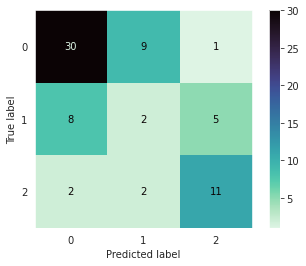

In [ ]:
test_classification_models(X_train, X_test, y_train, y_test)

### Experiments with oversampled data


In [ ]:
sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X, y) 

In [ ]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 58.97%
              precision    recall  f1-score   support

           0       0.59      0.55      0.57        40
           1       0.46      0.40      0.43        45
           2       0.71      0.91      0.79        32

    accuracy                           0.59       117
   macro avg       0.59      0.62      0.60       117
weighted avg       0.57      0.59      0.58       117



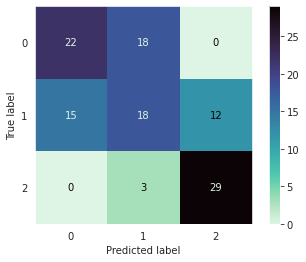

Gaussian NB
--------------------
--------------------
Accuracy Score : 62.39%
              precision    recall  f1-score   support

           0       0.65      0.60      0.62        40
           1       0.54      0.42      0.48        45
           2       0.67      0.94      0.78        32

    accuracy                           0.62       117
   macro avg       0.62      0.65      0.63       117
weighted avg       0.61      0.62      0.61       117



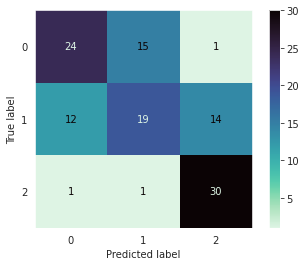

Random forest classifier
--------------------
--------------------
Accuracy Score : 82.05%
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.88      0.64      0.74        45
           2       0.74      1.00      0.85        32

    accuracy                           0.82       117
   macro avg       0.83      0.84      0.82       117
weighted avg       0.83      0.82      0.81       117



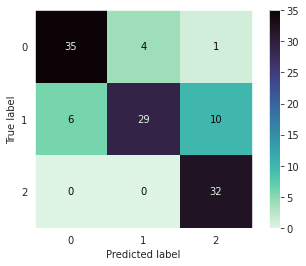

XGB classifier
--------------------
--------------------
Accuracy Score : 79.49%
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        40
           1       0.77      0.73      0.75        45
           2       0.79      0.97      0.87        32

    accuracy                           0.79       117
   macro avg       0.80      0.81      0.80       117
weighted avg       0.80      0.79      0.79       117



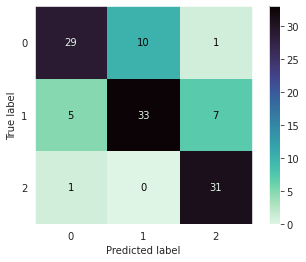

K neighbors
--------------------
--------------------
Accuracy Score : 71.79%
              precision    recall  f1-score   support

           0       0.74      0.57      0.65        40
           1       0.71      0.71      0.71        45
           2       0.71      0.91      0.79        32

    accuracy                           0.72       117
   macro avg       0.72      0.73      0.72       117
weighted avg       0.72      0.72      0.71       117



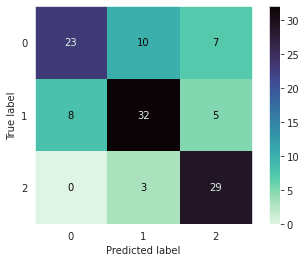

Decision tree classifier
--------------------
--------------------
Accuracy Score : 70.94%
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        40
           1       0.65      0.71      0.68        45
           2       0.82      0.88      0.85        32

    accuracy                           0.71       117
   macro avg       0.72      0.72      0.72       117
weighted avg       0.71      0.71      0.71       117



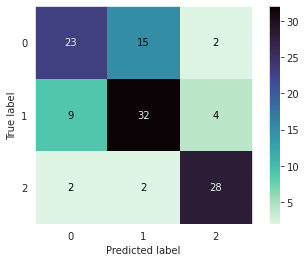

SVM
--------------------
--------------------
Accuracy Score : 54.7%
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        40
           1       0.59      0.29      0.39        45
           2       0.50      0.97      0.66        32

    accuracy                           0.55       117
   macro avg       0.57      0.59      0.53       117
weighted avg       0.57      0.55      0.52       117



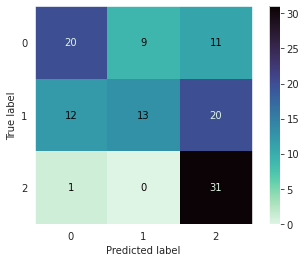

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 67.52%
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        40
           1       0.58      0.56      0.57        45
           2       0.68      0.88      0.77        32

    accuracy                           0.68       117
   macro avg       0.68      0.69      0.68       117
weighted avg       0.68      0.68      0.67       117



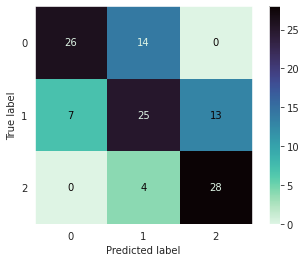

Decision tree classifier
--------------------
--------------------
Accuracy Score : 67.52%
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        40
           1       0.58      0.56      0.57        45
           2       0.68      0.88      0.77        32

    accuracy                           0.68       117
   macro avg       0.68      0.69      0.68       117
weighted avg       0.68      0.68      0.67       117



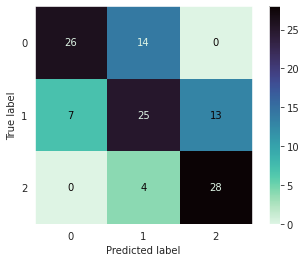

In [ ]:
test_classification_models(X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)

# Exploratory regression experiments with statistical values for the whole jumbo

In [ ]:
X = runs.drop(columns=['Run number', 'Total waste percentage', 'Number of orders', 'Class'])
y = runs['Total waste percentage']

In [ ]:
X

Max width  Min width  ...  Number of ordered reels  Weighted average width
0         4900        800  ...               442.910547             2709.066292
1         4900        500  ...               432.623483             2574.588114
2         4900        700  ...               380.490872             3314.418176
3         4100       1200  ...               218.253272             2974.281246
4         4400       1300  ...               224.999823             2674.563460
..         ...        ...  ...                      ...                     ...
345       5000        500  ...              2121.256167             2815.527512
346       4800        500  ...              1687.694415             2278.561711
347       4800        500  ...              1269.308554             2988.288095
348       5000        500  ...              2325.504292             2644.072991
349       5000        500  ...              1493.986366             2722.454525

[350 rows x 6 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[13:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000160
6                    XGBRFRegressor  ...             0.000011
7  Polynomial regression 2nd degree  ...             0.000003
5             DecisionTreeRegressor  ...             0.000017
8  Polynomial regression 3nd degree  ...             0.000002
3                     BayesianRidge  ...             0.000016
0                 Linear regression  ...             0.000036
2                        ElasticNet  ...             0.000016
1                     SGD regressor  ...             0.000016

[9 rows x 5 columns]

## Results with stratified K fold validation

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def test_regression_models_with_K_Fold_Validation(l_x, l_y, k = 10, repeats = 3):
  results = {}
  names_list = []
  mean_absolute_error_score = []
  # prepare the cross-validation procedure
  cv = RepeatedKFold(n_splits=k, n_repeats=repeats, random_state=1)

  names_list.append('Linear regression')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('SGD regressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(SGDRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('ElasticNet')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(ElasticNet(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('BayesianRidge')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(BayesianRidge(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('RandomForestRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(RandomForestRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('DecisionTreeRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(DecisionTreeRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('XGBRFRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(XGBRFRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('Polynomial regression 2nd degree')
  poly_reg = PolynomialFeatures(degree=2)
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), poly_reg.fit_transform(l_x), l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('Polynomial regression 3nd degree')
  poly_reg = PolynomialFeatures(degree=3)
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), poly_reg.fit_transform(l_x), l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  data = {'Model name':names_list,
          'Mean absolute error':mean_absolute_error_score}
          
  return pd.DataFrame.from_dict(data).sort_values(by=['Mean absolute error'])

In [ ]:
results = test_regression_models_with_K_Fold_Validation(X, y)

In [ ]:
results

Model name  Mean absolute error
4             RandomForestRegressor         9.131048e-01
6                    XGBRFRegressor         9.468547e-01
5             DecisionTreeRegressor         1.185763e+00
7  Polynomial regression 2nd degree         1.328774e+00
8  Polynomial regression 3nd degree         1.371351e+00
3                     BayesianRidge         1.381486e+00
2                        ElasticNet         1.391534e+00
0                 Linear regression         1.391610e+00
1                     SGD regressor         1.804427e+16

## Pass input from MinMaxScaler

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[08:11:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
6                    XGBRFRegressor  ...             0.000005
4             RandomForestRegressor  ...             0.000125
7  Polynomial regression 2nd degree  ...             0.000001
5             DecisionTreeRegressor  ...             0.000002
1                     SGD regressor  ...             0.000003
3                     BayesianRidge  ...             0.000002
0                 Linear regression  ...             0.000002
8  Polynomial regression 3nd degree  ...             0.000002
2                        ElasticNet  ...             0.000003

[9 rows x 5 columns]

In [ ]:
results = test_regression_models_with_K_Fold_Validation(x_scaled, y)

In [ ]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.920020
6                    XGBRFRegressor             0.946845
7  Polynomial regression 2nd degree             1.055426
5             DecisionTreeRegressor             1.204782
1                     SGD regressor             1.329155
3                     BayesianRidge             1.375566
0                 Linear regression             1.391610
2                        ElasticNet             1.612608
8  Polynomial regression 3nd degree             1.715194

## Pass input from StandardScaler


In [ ]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(X)

In [ ]:
X.columns


Index(['Max width', 'Min width', 'Average reel width', 'Deviation of widths',
       'Number of ordered reels', 'Weighted average width'],
      dtype='object')

In [ ]:
x_standarized = pd.DataFrame(x_standarized, columns=['Max width', 'Min width', 'Average reel width', 'Deviation of widths',
       'Number of ordered reels', 'Weighted average width'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_standarized, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[08:13:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
6                    XGBRFRegressor  ...             0.000013
4             RandomForestRegressor  ...             0.000155
7  Polynomial regression 2nd degree  ...             0.000002
5             DecisionTreeRegressor  ...             0.000017
2                        ElasticNet  ...             0.000016
3                     BayesianRidge  ...             0.000015
1                     SGD regressor  ...             0.000030
0                 Linear regression  ...             0.000021
8  Polynomial regression 3nd degree  ...             0.000003

[9 rows x 5 columns]

In [ ]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [ ]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.913223
6                    XGBRFRegressor             0.946841
7  Polynomial regression 2nd degree             1.075365
5             DecisionTreeRegressor             1.173093
2                        ElasticNet             1.313405
3                     BayesianRidge             1.374945
1                     SGD regressor             1.389232
0                 Linear regression             1.391610
8  Polynomial regression 3nd degree             1.406820

## Model tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd2
def calculate_feature_importance(l_model, l_x, l_y, use_property_coef = False):
  column_name = 'feature importance'
  if (use_property_coef):
    column_name = 'weights'
  l_x_train, l_x_test, l_y_train, l_y_test = train_test_split(l_x, l_y, test_size=0.20, random_state = 0)
  l_model.fit(l_x_train, l_y_train)
  column_name_list = []
  feature_importance_list = []
  for i in range(len(l_x.columns)):
    column_name_list.append(l_x.columns[i])
    if not use_property_coef:
      feature_importance_list.append(l_model.feature_importances_[i])
      continue
    feature_importance_list.append(l_model.coef_[i])
  # initialize data of lists.
  data = {'Column name':column_name_list,
          column_name :feature_importance_list}
  return pd2.DataFrame.from_dict(data).sort_values(by=[column_name], ascending=False)

### Bayesian ridge regressor tuning

In [ ]:
random_grid = {"n_iter": np.arange(100, 10000, 100),
                      "alpha_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "alpha_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 1e-06,
 'alpha_2': 1e-05,
 'fit_intercept': True,
 'lambda_1': 0.01,
 'lambda_2': 1e-07,
 'n_iter': 3400,
 'normalize': False}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :1.375'

In [ ]:
feature_importance = calculate_feature_importance(BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400), x_standarized, y, True)

In [ ]:
feature_importance

Column name   weights
5   Weighted average width  1.176609
1                Min width  0.433434
2       Average reel width  0.046081
0                Max width  0.012132
3      Deviation of widths -0.140826
4  Number of ordered reels -0.498461

### Random forest regressor tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =20, min_samples_leaf= 1, min_samples_split = 2 ,n_estimators= 1000, max_features= 'sqrt')
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.885'

In [ ]:
feature_importance = calculate_feature_importance(RandomForestRegressor(max_depth =20, min_samples_leaf= 1, min_samples_split = 2 ,n_estimators= 1000, max_features= 'sqrt'), x_standarized, y)

In [ ]:
feature_importance

Column name  feature importance
5   Weighted average width            0.360229
2       Average reel width            0.277303
4  Number of ordered reels            0.138114
1                Min width            0.107782
3      Deviation of widths            0.083103
0                Max width            0.033470

### Decision tree regressor tuning

In [ ]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 40, max_features= 'auto', min_samples_leaf=2, min_samples_split=10, splitter= 'random')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.053'

In [ ]:
feature_importance = calculate_feature_importance(DecisionTreeRegressor(criterion = 'squared_error', max_depth = 40, max_features= 'auto', min_samples_leaf=2, min_samples_split=10, splitter= 'random'), x_standarized, y)

In [ ]:
feature_importance

Column name  feature importance
2       Average reel width            0.541101
0                Max width            0.222852
1                Min width            0.100663
5   Weighted average width            0.061040
4  Number of ordered reels            0.054209
3      Deviation of widths            0.020135

### Elastic net regressor tuning

In [ ]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'l1_ratio': 0.30000000000000004,
 'max_iter': 1,
 'selection': 'random'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=0.1, l1_ratio=0.3, max_iter = 1, selection= 'random'), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :1.384'

In [ ]:
feature_importance = calculate_feature_importance(ElasticNet(alpha=0.1, l1_ratio=0.3, max_iter = 1, selection= 'random'), x_standarized, y, True)

In [ ]:
feature_importance

Column name   weights
5   Weighted average width  1.263152
1                Min width  0.586354
0                Max width  0.181213
3      Deviation of widths  0.000000
4  Number of ordered reels  0.000000
2       Average reel width -0.144277

### SGD regressor tuning

In [ ]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'epsilon': 1e-09,
 'l1_ratio': 0.8500000000000001,
 'learning_rate': 'constant',
 'max_iter': 6100,
 'penalty': 'l2',
 'tol': 1e-08}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.1, l1_ratio=0.85, epsilon=1e-09, learning_rate='constant', max_iter = 6100, penalty= 'l2', tol=1e-08), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :1.397'

In [ ]:
feature_importance = calculate_feature_importance(SGDRegressor(alpha=0.1, l1_ratio=0.85, epsilon=1e-09, learning_rate='constant', max_iter = 6100, penalty= 'l2', tol=1e-08), x_standarized, y, True)

In [ ]:
feature_importance

Column name   weights
5   Weighted average width  0.792235
1                Min width  0.460296
2       Average reel width  0.136825
0                Max width  0.010971
3      Deviation of widths -0.156970
4  Number of ordered reels -0.457132

## Deep learning experiments

Import pre required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential as seq
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(42)

In [ ]:
def plot_loss_and_val_loss(hist, loss_label = 'Mean Absolute Error (MAE)', title=''):
  fig, ax1 = plt.subplots(1, 1)
  ax1.plot(hist.epoch, hist.history['loss'], color='b', label='Loss')
  ax1.plot(hist.epoch, hist.history['val_loss'], color='orange', label='Val_loss')
  ax1.set_xticks(range(0, len(hist.epoch)))
  ax1.set_title('Training Error ' + title )
  ax1.set_ylabel(loss_label, fontsize=12)
  ax1.set_xlabel('#Epoch', fontsize=12)
  fig.set_size_inches(18.5, 10.5)
  plt.legend()
  plt.show()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10, restore_best_weights=True)

In [ ]:
epochs = 4000
batch_size = 2

In [ ]:
X

Max width  Min width  ...  Number of ordered reels  Weighted average width
0         4900        800  ...               442.910547             2709.066292
1         4900        500  ...               432.623483             2574.588114
2         4900        700  ...               380.490872             3314.418176
3         4100       1200  ...               218.253272             2974.281246
4         4400       1300  ...               224.999823             2674.563460
..         ...        ...  ...                      ...                     ...
345       5000        500  ...              2121.256167             2815.527512
346       4800        500  ...              1687.694415             2278.561711
347       4800        500  ...              1269.308554             2988.288095
348       5000        500  ...              2325.504292             2644.072991
349       5000        500  ...              1493.986366             2722.454525

[350 rows x 6 columns]

### Single dense model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 97.
Epoch 00107: early stopping


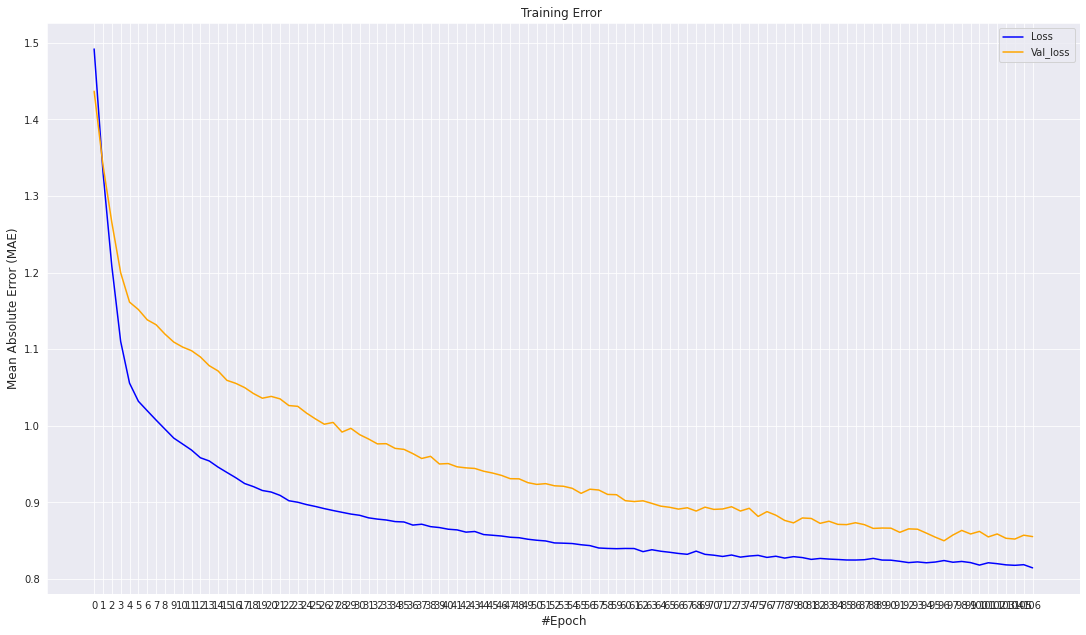

In [ ]:
plot_loss_and_val_loss(hist)

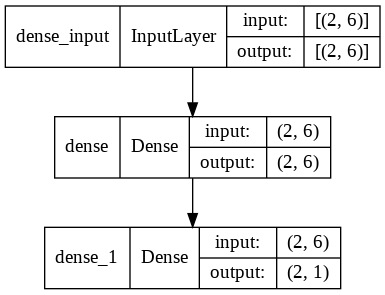

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.8553979396820068'

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 80.
Epoch 00090: early stopping


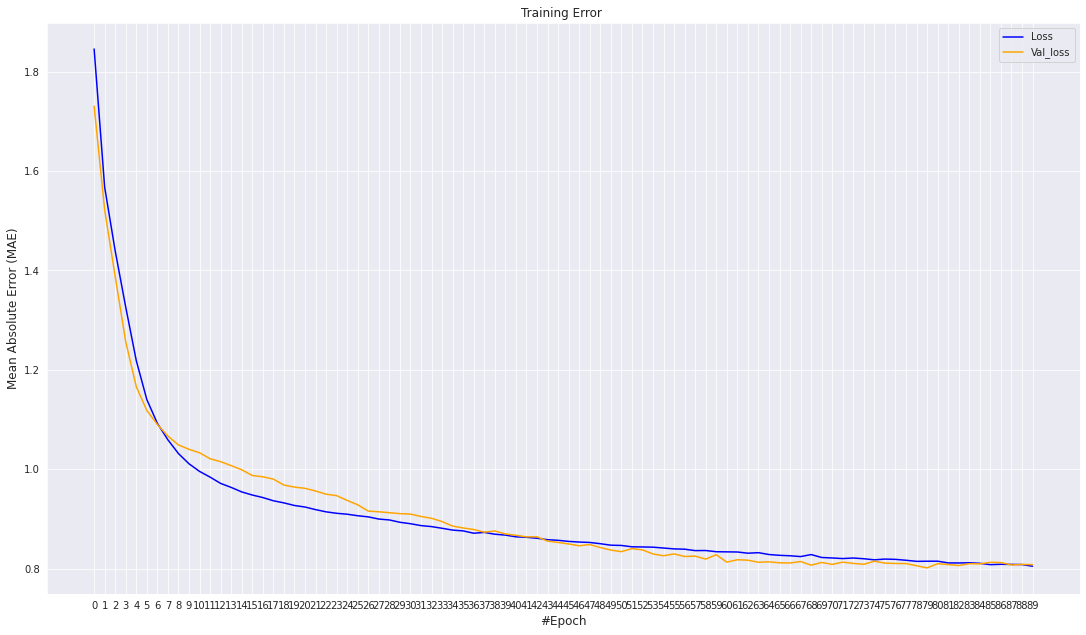

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.8077688217163086'

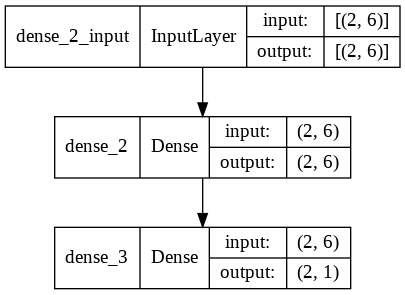

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Two denses model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 154.
Epoch 00164: early stopping


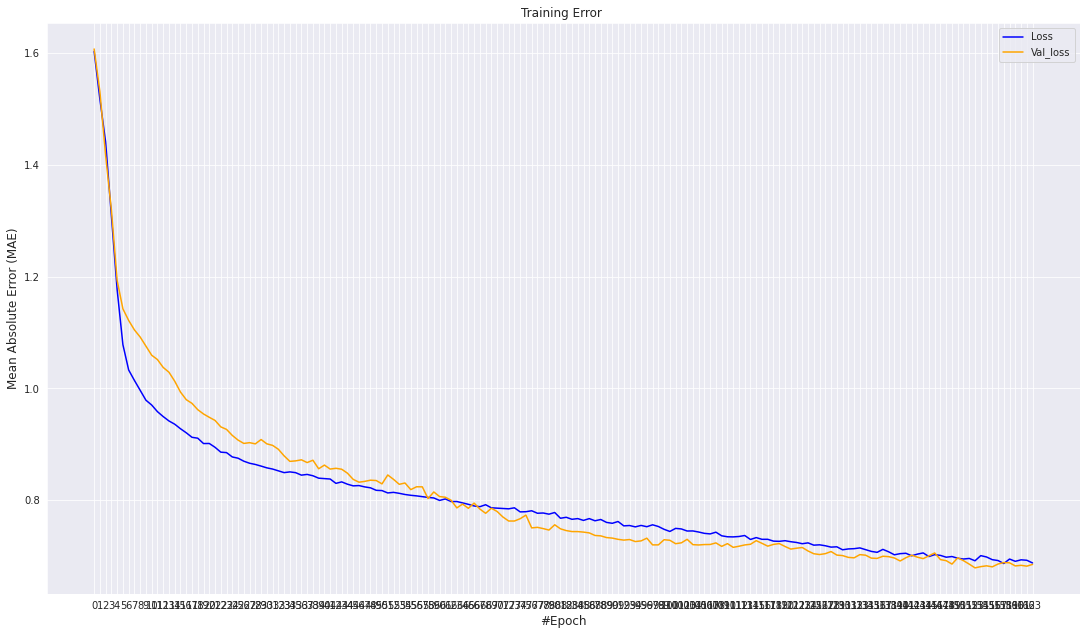

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.6847939491271973'

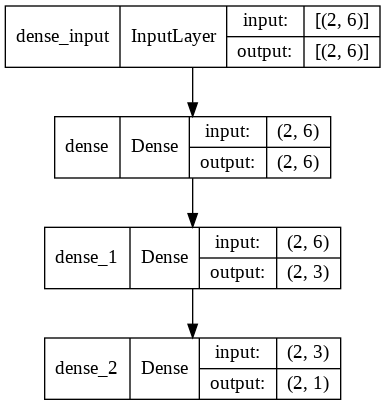

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
X_train

Max width  Min width  ...  Number of ordered reels  Weighted average width
264   0.728551   0.379957  ...                -1.062051                0.802248
239   0.728551  -0.612468  ...                 1.219225               -0.839103
304   0.390812  -0.612468  ...                 0.731631                0.664497
21    0.728551   1.372381  ...                -1.204060                1.606508
135   0.053073  -0.612468  ...                -0.406245               -2.102417
..         ...        ...  ...                      ...                     ...
323   0.728551  -0.612468  ...                 0.631375               -0.702326
192   0.390812  -0.281659  ...                -0.415563                0.717534
117  -0.284666  -0.281659  ...                -0.150419               -0.101388
47   -0.284666   4.349654  ...                 0.097111                0.689565
172  -1.635621   0.710765  ...                -1.103745               -0.467331

[280 rows x 6 columns]

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 51.
Epoch 00061: early stopping


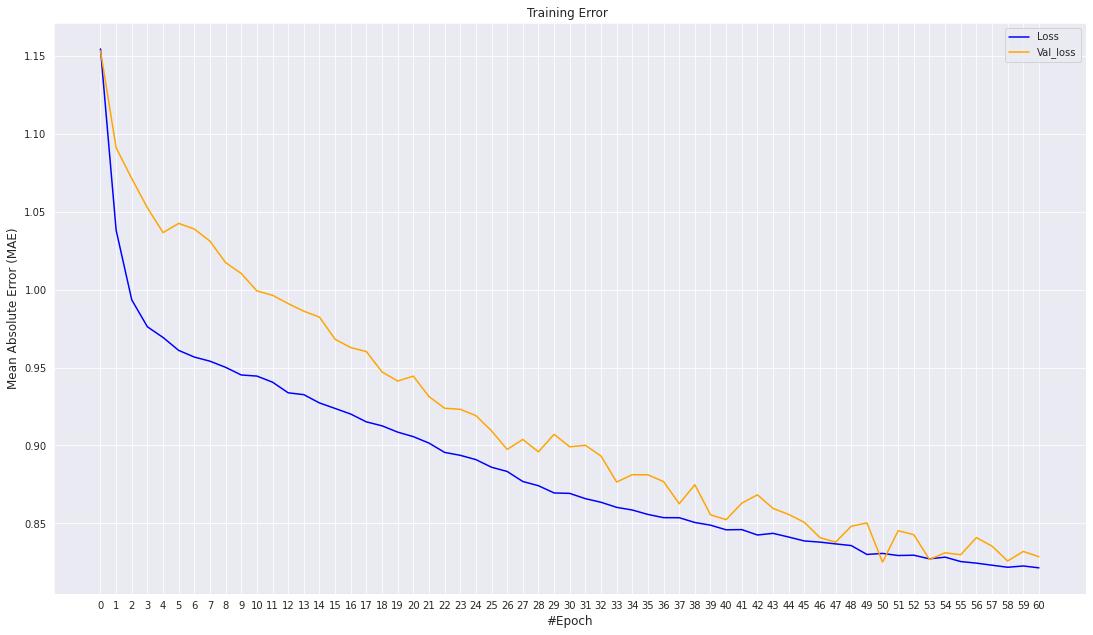

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.8286311626434326'

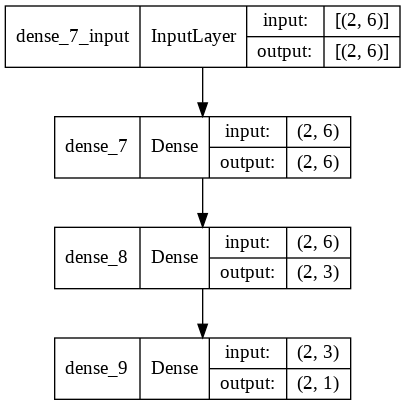

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Three denses model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 69.
Epoch 00079: early stopping


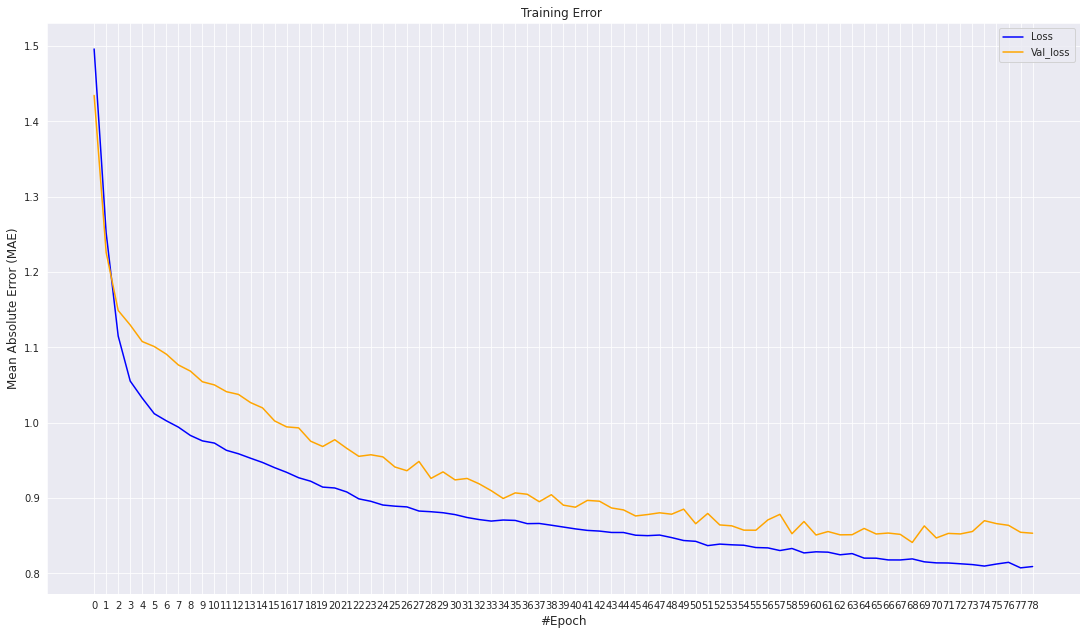

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.8534160852432251'

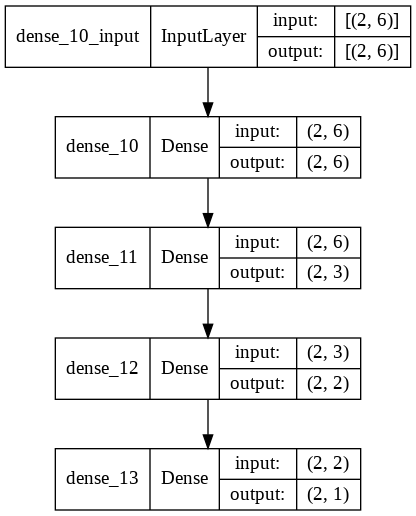

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 24.
Epoch 00034: early stopping


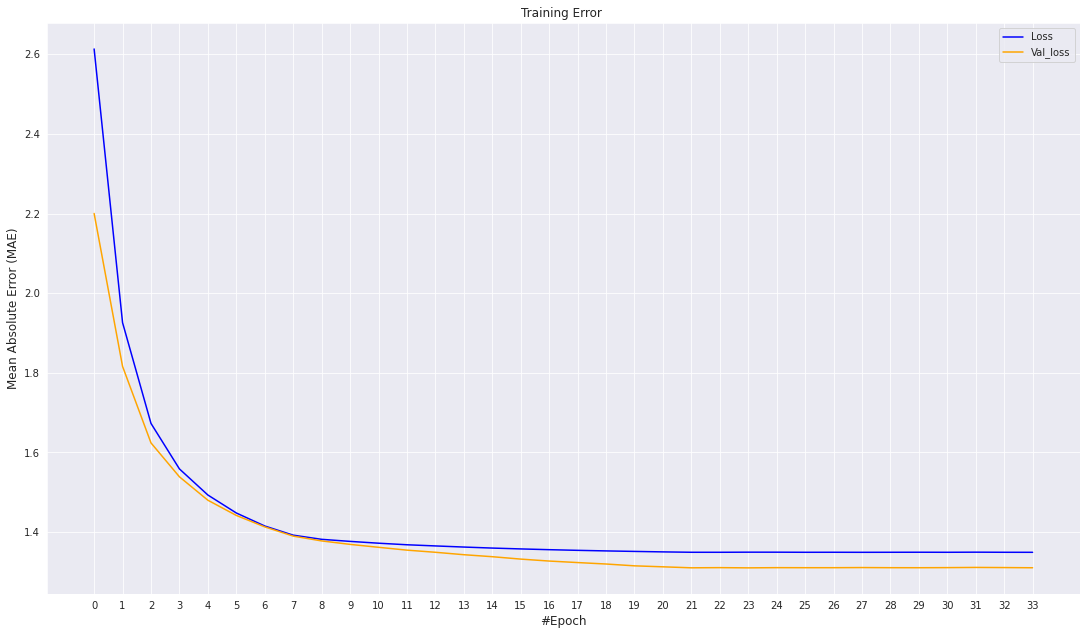

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.3103429079055786'

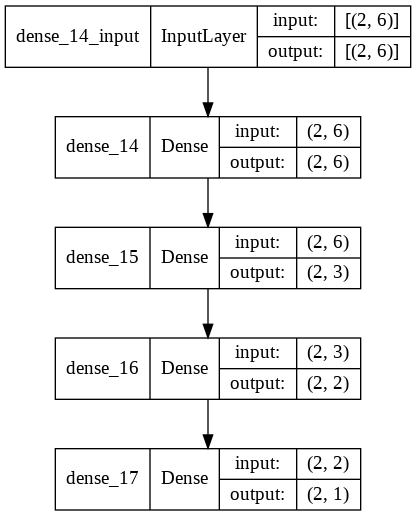

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(12, activation = 'relu', input_dim = 6))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 38.
Epoch 00048: early stopping


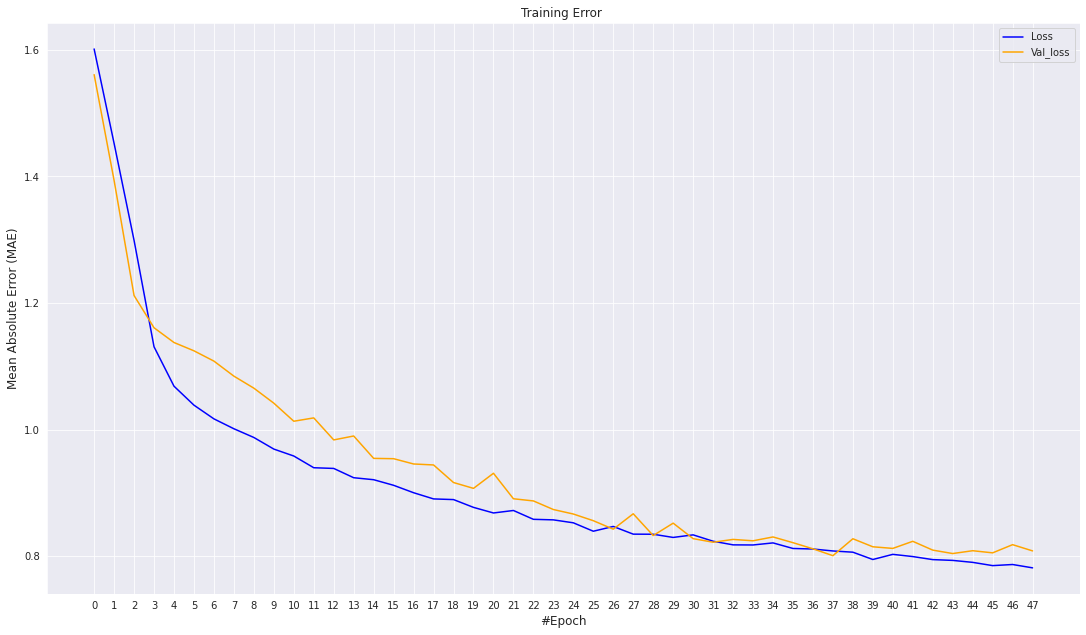

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.8081141710281372'

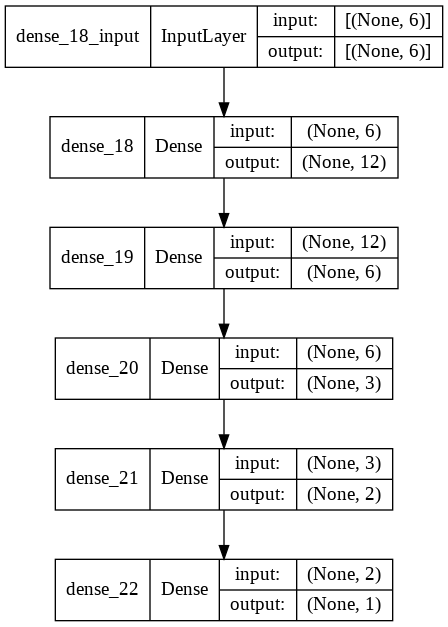

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(12, activation = 'relu', input_dim = 6))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 105.
Epoch 00115: early stopping


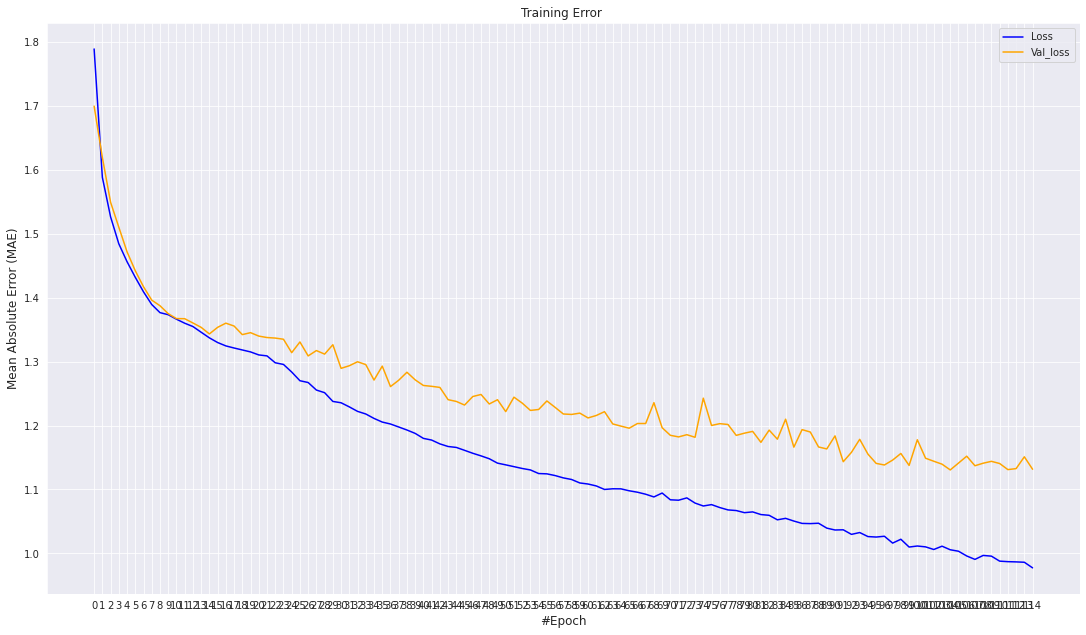

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.1316455602645874'

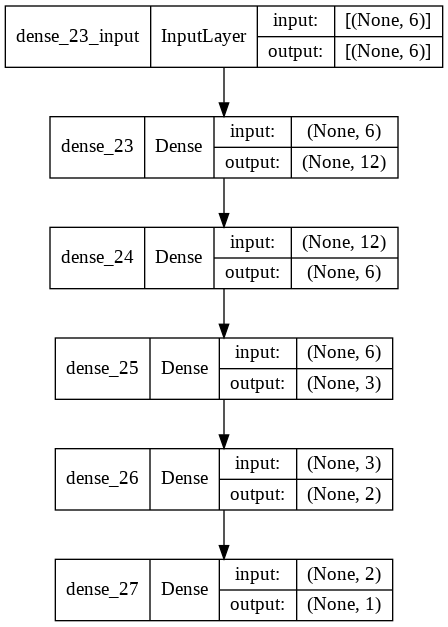

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Exploratory regression experiments with extended dataset


## Experiments after column selection

In [ ]:
extended_runs.columns

Index(['Run number', 'Max width', 'Min width', 'Number of orders',
       'Average reel width', 'Deviation of widths', 'Number of orders 1',
       'Number of orders 2', 'Number of orders 3', 'Number of orders 4',
       'Number of orders 5', 'Number of orders 6', 'Number of orders 7',
       'Number of orders 8', 'Number of orders 9', 'Number of orders 10',
       'Number of ordered reels 1', 'Number of ordered reels 2',
       'Number of ordered reels 3', 'Number of ordered reels 4',
       'Number of ordered reels 5', 'Number of ordered reels 6',
       'Number of ordered reels 7', 'Number of ordered reels 8',
       'Number of ordered reels 9', 'Number of ordered reels 10',
       'MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10',
       'Deviation

In [ ]:
extended_runs = extended_runs.drop(columns=['Class'])

In [ ]:
extended_runs_with_selected_columns = extended_runs.drop(columns=['Run number', 'Min width 1', 'Min width 2', 'Min width 3',
       'Min width 4', 'Min width 5', 'Min width 6', 'Min width 7',
       'Min width 8', 'Min width 9', 'Min width 10', 'Max width 1',
       'Max width 2', 'Max width 3', 'Max width 4', 'Max width 5',
       'Max width 6', 'Max width 7', 'Max width 8', 'Max width 9',
       'Max width 10'])

In [ ]:
extended_runs_with_selected_columns

Max width  Min width  ...  Average reel width 10  Total waste percentage
0         4300        500  ...                    0.0                1.253918
1         4900        800  ...                    0.0                2.303394
2         4600        500  ...                    0.0                0.751089
3         4900        500  ...                    0.0                0.086580
4         5000        600  ...                    0.0                6.347962
..         ...        ...  ...                    ...                     ...
345       4900        600  ...                    0.0                0.483746
346       5000        500  ...                    0.0                1.234568
347       5000        500  ...                    0.0                0.943396
348       5000        500  ...                    0.0                0.311526
349       4900        500  ...                    0.0                0.686872

[350 rows x 56 columns]

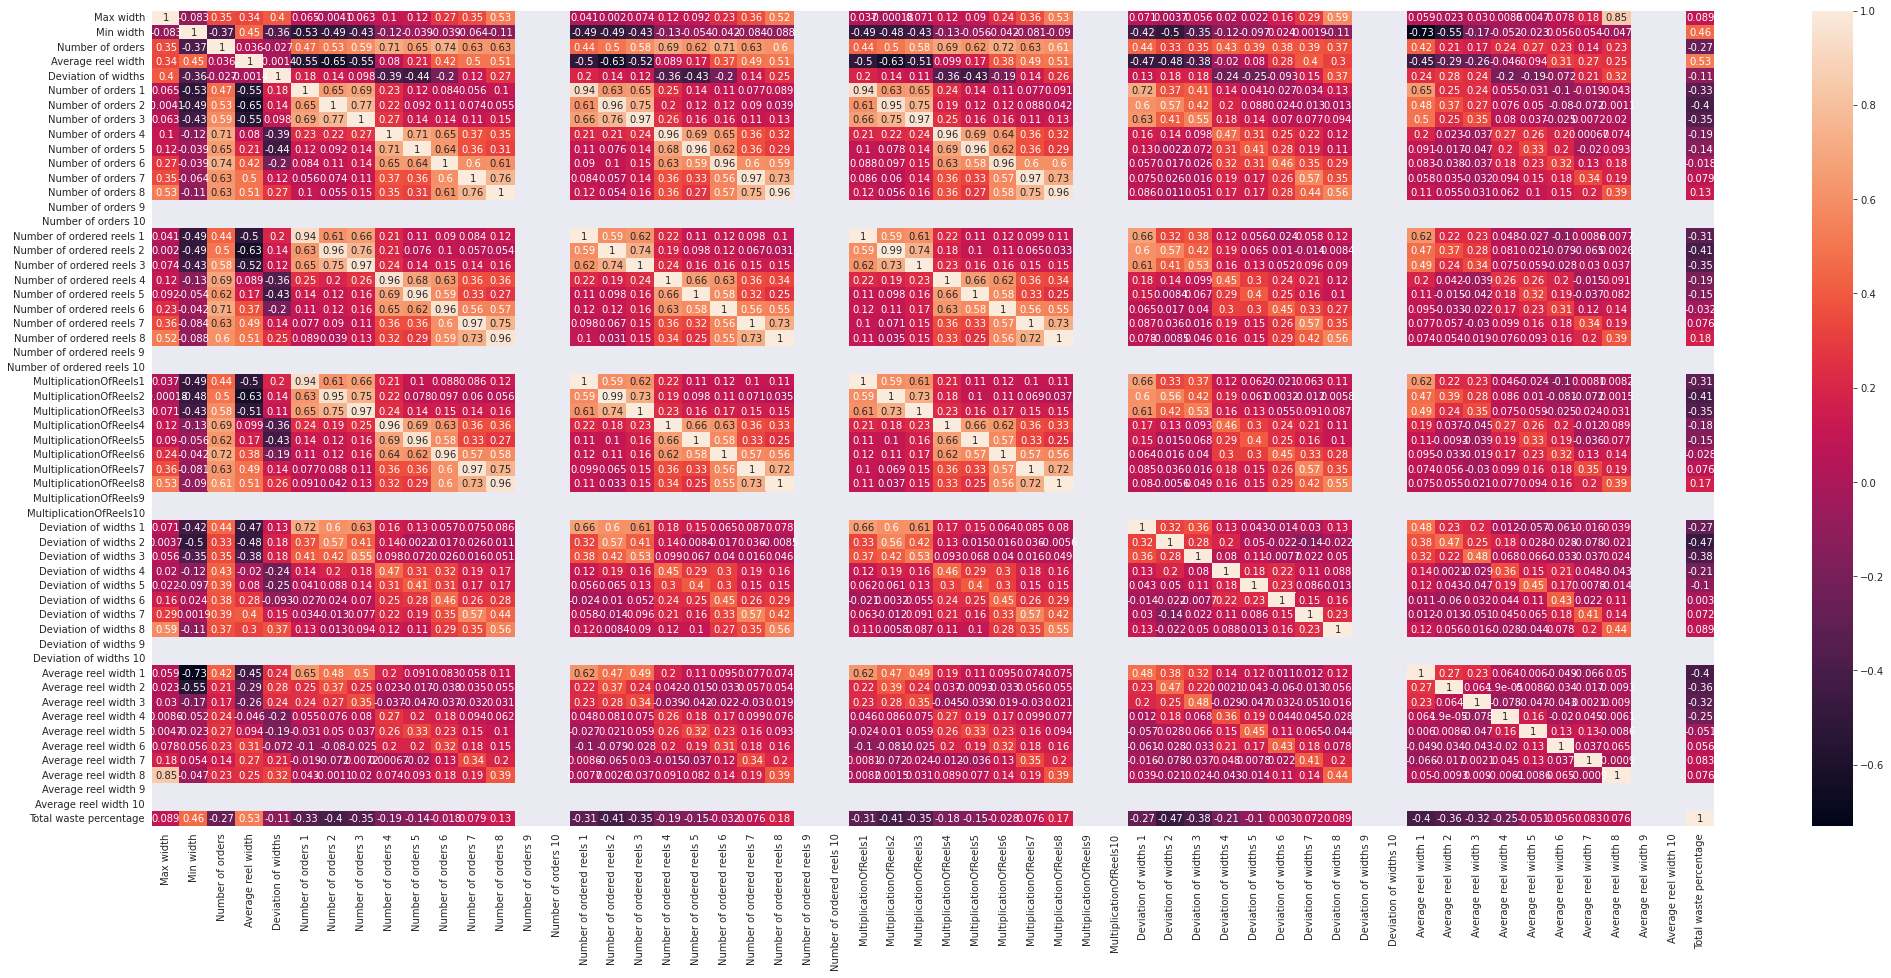

In [ ]:
plot_corr_matrix(extended_runs_with_selected_columns)

In [ ]:
X = extended_runs_with_selected_columns.fillna(0).drop(columns=['Total waste percentage'])
y = extended_runs_with_selected_columns['Total waste percentage']

In [ ]:
X

Max width  Min width  ...  Average reel width 9  Average reel width 10
0         4300        500  ...                   0.0                    0.0
1         4900        800  ...                   0.0                    0.0
2         4600        500  ...                   0.0                    0.0
3         4900        500  ...                   0.0                    0.0
4         5000        600  ...                   0.0                    0.0
..         ...        ...  ...                   ...                    ...
345       4900        600  ...                   0.0                    0.0
346       5000        500  ...                   0.0                    0.0
347       5000        500  ...                   0.0                    0.0
348       5000        500  ...                   0.0                    0.0
349       4900        500  ...                   0.0                    0.0

[350 rows x 55 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[14:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000152
6                    XGBRFRegressor  ...             0.000021
0                 Linear regression  ...             0.000035
2                        ElasticNet  ...             0.000032
5             DecisionTreeRegressor  ...             0.000021
3                     BayesianRidge  ...             0.000033
7  Polynomial regression 2nd degree  ...             0.000063
8  Polynomial regression 3nd degree  ...             0.000101
1                     SGD regressor  ...             0.000032

[9 rows x 5 columns]

## Results with stratified K fold validation

In [ ]:
results = test_regression_models_with_K_Fold_Validation(X, y)

In [ ]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000223
6                    XGBRFRegressor  ...             0.000026
5             DecisionTreeRegressor  ...             0.000026
0                 Linear regression  ...             0.000053
2                        ElasticNet  ...             0.000045
3                     BayesianRidge  ...             0.000053
7  Polynomial regression 2nd degree  ...             0.000064
8  Polynomial regression 3nd degree  ...             0.000097
1                     SGD regressor  ...             0.000048

[9 rows x 5 columns]

## Pass input from MinMaxScaler

In [ ]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[14:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000133
6                    XGBRFRegressor  ...             0.000007
0                 Linear regression  ...             0.000003
3                     BayesianRidge  ...             0.000002
5             DecisionTreeRegressor  ...             0.000002
1                     SGD regressor  ...             0.000003
8  Polynomial regression 3nd degree  ...             0.000070
7  Polynomial regression 2nd degree  ...             0.000062
2                        ElasticNet  ...             0.000003

[9 rows x 5 columns]

In [ ]:
results = test_regression_models_with_K_Fold_Validation(x_scaled, y)

In [ ]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.939998
6                    XGBRFRegressor             0.961126
3                     BayesianRidge             1.197151
1                     SGD regressor             1.233465
5             DecisionTreeRegressor             1.256665
0                 Linear regression             1.266501
8  Polynomial regression 3nd degree             1.559910
2                        ElasticNet             1.611136
7  Polynomial regression 2nd degree             1.822612

In [ ]:
X.columns

Index(['Max width', 'Min width', 'Average reel width', 'Deviation of widths',
       'Number of ordered reels', 'Weighted average width'],
      dtype='object')

## Pass input from StandardScaler

In [ ]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(X)

In [ ]:
X.columns

Index(['Max width', 'Min width', 'Number of orders', 'Average reel width',
       'Deviation of widths', 'Number of orders 1', 'Number of orders 2',
       'Number of orders 3', 'Number of orders 4', 'Number of orders 5',
       'Number of orders 6', 'Number of orders 7', 'Number of orders 8',
       'Number of orders 9', 'Number of orders 10',
       'Number of ordered reels 1', 'Number of ordered reels 2',
       'Number of ordered reels 3', 'Number of ordered reels 4',
       'Number of ordered reels 5', 'Number of ordered reels 6',
       'Number of ordered reels 7', 'Number of ordered reels 8',
       'Number of ordered reels 9', 'Number of ordered reels 10',
       'MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10',
       'Deviation of widths 1',

In [ ]:
x_standarized = pd.DataFrame(x_standarized, columns=['Max width', 'Min width', 'Number of orders', 'Average reel width',
       'Deviation of widths', 'Number of orders 1', 'Number of orders 2',
       'Number of orders 3', 'Number of orders 4', 'Number of orders 5',
       'Number of orders 6', 'Number of orders 7', 'Number of orders 8',
       'Number of orders 9', 'Number of orders 10',
       'Number of ordered reels 1', 'Number of ordered reels 2',
       'Number of ordered reels 3', 'Number of ordered reels 4',
       'Number of ordered reels 5', 'Number of ordered reels 6',
       'Number of ordered reels 7', 'Number of ordered reels 8',
       'Number of ordered reels 9', 'Number of ordered reels 10',
       'MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10',
       'Deviation of widths 1', 'Deviation of widths 2',
       'Deviation of widths 3', 'Deviation of widths 4',
       'Deviation of widths 5', 'Deviation of widths 6',
       'Deviation of widths 7', 'Deviation of widths 8',
       'Deviation of widths 9', 'Deviation of widths 10',
       'Average reel width 1', 'Average reel width 2', 'Average reel width 3',
       'Average reel width 4', 'Average reel width 5', 'Average reel width 6',
       'Average reel width 7', 'Average reel width 8', 'Average reel width 9',
       'Average reel width 10'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[14:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000129
6                    XGBRFRegressor  ...             0.000008
5             DecisionTreeRegressor  ...             0.000002
0                 Linear regression  ...             0.000003
3                     BayesianRidge  ...             0.000002
1                     SGD regressor  ...             0.000003
8  Polynomial regression 3nd degree  ...             0.000089
7  Polynomial regression 2nd degree  ...             0.000006
2                        ElasticNet  ...             0.000003

[9 rows x 5 columns]

In [ ]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [ ]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.923190
6                    XGBRFRegressor             0.961208
3                     BayesianRidge             1.196303
1                     SGD regressor             1.209363
8  Polynomial regression 3nd degree             1.259956
5             DecisionTreeRegressor             1.265979
0                 Linear regression             1.266501
2                        ElasticNet             1.273662
7  Polynomial regression 2nd degree             1.771779

## Model tuning

### Bayesian ridge regressor tuning

In [ ]:
random_grid = {"n_iter": np.arange(100, 10000, 100),
                      "alpha_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "alpha_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 0.1,
 'alpha_2': 1e-05,
 'fit_intercept': True,
 'lambda_1': 1e-05,
 'lambda_2': 0.1,
 'n_iter': 6100,
 'normalize': False}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 0.1, alpha_2 = 1e-05, lambda_1 = 1e-05, lambda_2 = 0.1, n_iter = 6100)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :1.195'

In [ ]:
feature_importance = calculate_feature_importance(BayesianRidge(alpha_1 = 0.1, alpha_2 = 1e-05, lambda_1 = 1e-05, lambda_2 = 0.1, n_iter = 6100), x_standarized, y, True)

In [ ]:
feature_importance

Column name       weights
3           Average reel width  7.155131e-01
32      MultiplicationOfReels8  2.380395e-01
22   Number of ordered reels 8  2.359040e-01
6           Number of orders 2  1.970591e-01
1                    Min width  1.909886e-01
5           Number of orders 1  1.832626e-01
0                    Max width  1.587735e-01
7           Number of orders 3  1.448571e-01
21   Number of ordered reels 7  9.955467e-02
42       Deviation of widths 8  8.965410e-02
31      MultiplicationOfReels7  8.357728e-02
49        Average reel width 5  6.570665e-02
35       Deviation of widths 1  4.755022e-02
34     MultiplicationOfReels10  8.478244e-16
44      Deviation of widths 10  5.353104e-16
43       Deviation of widths 9  2.671486e-16
14         Number of orders 10  4.382754e-18
53        Average reel width 9  0.000000e+00
54       Average reel width 10  0.000000e+00
13          Number of orders 9 -1.673154e-16
23   Number of ordered reels 9 -1.451822e-15
33      MultiplicationOfReels9 -1.768470e-15
24  Number of ordered reels 10 -2.587164e-15
2             Number of orders -4.340116e-03
25      MultiplicationOfReels1 -4.807780e-03
16   Number of ordered reels 2 -6.403630e-03
28      MultiplicationOfReels4 -1.051235e-02
39       Deviation of widths 5 -1.691682e-02
51        Average reel width 7 -2.662798e-02
15   Number of ordered reels 1 -2.715719e-02
20   Number of ordered reels 6 -3.989832e-02
8           Number of orders 4 -4.044355e-02
27      MultiplicationOfReels3 -5.457259e-02
50        Average reel width 6 -5.957563e-02
40       Deviation of widths 6 -6.036060e-02
41       Deviation of widths 7 -7.469372e-02
26      MultiplicationOfReels2 -7.539003e-02
48        Average reel width 4 -7.863861e-02
17   Number of ordered reels 3 -8.206161e-02
11          Number of orders 7 -8.580867e-02
18   Number of ordered reels 4 -9.337421e-02
30      MultiplicationOfReels6 -9.557260e-02
52        Average reel width 8 -9.759741e-02
10          Number of orders 6 -1.000998e-01
12          Number of orders 8 -1.238761e-01
9           Number of orders 5 -1.312827e-01
45        Average reel width 1 -1.424098e-01
19   Number of ordered reels 5 -1.429619e-01
29      MultiplicationOfReels5 -1.799535e-01
38       Deviation of widths 4 -1.839282e-01
37       Deviation of widths 3 -1.909985e-01
46        Average reel width 2 -2.172431e-01
36       Deviation of widths 2 -3.037928e-01
47        Average reel width 3 -4.160976e-01
4          Deviation of widths -4.844236e-01

### Random forest regressor tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =80, min_samples_leaf= 4, min_samples_split = 5 ,n_estimators= 200)
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.897'

In [ ]:
feature_importance = calculate_feature_importance(RandomForestRegressor(max_depth =80, min_samples_leaf= 4, min_samples_split = 5 ,n_estimators= 200), x_standarized, y)

In [ ]:
feature_importance

Column name  feature importance
3           Average reel width            0.451670
26      MultiplicationOfReels2            0.086988
16   Number of ordered reels 2            0.079104
17   Number of ordered reels 3            0.069640
27      MultiplicationOfReels3            0.060342
47        Average reel width 3            0.044351
48        Average reel width 4            0.026650
1                    Min width            0.017200
50        Average reel width 6            0.013893
49        Average reel width 5            0.011623
22   Number of ordered reels 8            0.010546
6           Number of orders 2            0.010139
32      MultiplicationOfReels8            0.009826
4          Deviation of widths            0.009526
36       Deviation of widths 2            0.006607
37       Deviation of widths 3            0.006369
38       Deviation of widths 4            0.005884
40       Deviation of widths 6            0.005812
46        Average reel width 2            0.005654
18   Number of ordered reels 4            0.005308
2             Number of orders            0.004959
52        Average reel width 8            0.004919
42       Deviation of widths 8            0.004528
15   Number of ordered reels 1            0.004424
51        Average reel width 7            0.004167
39       Deviation of widths 5            0.004001
7           Number of orders 3            0.003635
19   Number of ordered reels 5            0.003610
25      MultiplicationOfReels1            0.003493
9           Number of orders 5            0.002853
41       Deviation of widths 7            0.002651
29      MultiplicationOfReels5            0.002643
28      MultiplicationOfReels4            0.002561
20   Number of ordered reels 6            0.002508
21   Number of ordered reels 7            0.001991
12          Number of orders 8            0.001772
8           Number of orders 4            0.001743
31      MultiplicationOfReels7            0.001707
30      MultiplicationOfReels6            0.001409
10          Number of orders 6            0.000893
45        Average reel width 1            0.000645
11          Number of orders 7            0.000589
0                    Max width            0.000582
5           Number of orders 1            0.000413
35       Deviation of widths 1            0.000173
43       Deviation of widths 9            0.000000
44      Deviation of widths 10            0.000000
34     MultiplicationOfReels10            0.000000
33      MultiplicationOfReels9            0.000000
24  Number of ordered reels 10            0.000000
23   Number of ordered reels 9            0.000000
14         Number of orders 10            0.000000
13          Number of orders 9            0.000000
53        Average reel width 9            0.000000
54       Average reel width 10            0.000000

### Decision tree regressor tuning

In [ ]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'squared_error',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 60, max_features= 'auto', min_samples_leaf=4, min_samples_split=12, splitter= 'best')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.081'

In [ ]:
feature_importance = calculate_feature_importance(DecisionTreeRegressor(criterion = 'squared_error', max_depth = 60, max_features= 'auto', min_samples_leaf=4, min_samples_split=12, splitter= 'best'), x_standarized, y)

In [ ]:
feature_importance

Column name  feature importance
4          Average reel width            0.461458
28     MultiplicationOfReels3            0.167645
27     MultiplicationOfReels2            0.094745
48       Average reel width 3            0.084268
69                Max width 4            0.036473
..                        ...                 ...
20  Number of ordered reels 5            0.000000
24  Number of ordered reels 9            0.000000
49       Average reel width 4            0.000000
11         Number of orders 6            0.000000
75               Max width 10            0.000000

[76 rows x 2 columns]

### Elastic net regressor tuning

In [ ]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 10, 'l1_ratio': 0.0, 'max_iter': 1, 'selection': 'cyclic'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=10, l1_ratio=0.0, max_iter = 1, selection= 'cyclic'), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :1.194'

In [ ]:
feature_importance = calculate_feature_importance(ElasticNet(alpha=10, l1_ratio=0.0, max_iter = 1, selection= 'cyclic'), x_standarized, y, True)

In [ ]:
feature_importance

Column name   weights
4          Average reel width  0.097015
2                   Min width  0.088641
23  Number of ordered reels 8  0.031467
33     MultiplicationOfReels8  0.028584
12         Number of orders 7  0.027578
..                        ...       ...
17  Number of ordered reels 2 -0.057924
48       Average reel width 3 -0.060482
37      Deviation of widths 2 -0.064855
0                  Run number -0.065697
7          Number of orders 2 -0.067326

[76 rows x 2 columns]

### SGD regressor tuning

In [ ]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'epsilon': 1e-06,
 'l1_ratio': 0.2,
 'learning_rate': 'constant',
 'max_iter': 3500,
 'penalty': 'elasticnet',
 'tol': 1e-07}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.1, l1_ratio=0.2, epsilon=1e-06, learning_rate='constant', max_iter = 3500, penalty= 'elasticnet', tol=1e-07), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :1.365'

In [ ]:
feature_importance = calculate_feature_importance(SGDRegressor(alpha=0.1, l1_ratio=0.2, epsilon=1e-06, learning_rate='constant', max_iter = 3500, penalty= 'elasticnet', tol=1e-07), x_standarized, y, True)

In [ ]:
feature_importance

Column name   weights
4          Average reel width  0.720504
33     MultiplicationOfReels8  0.255704
23  Number of ordered reels 8  0.247447
2                   Min width  0.243261
7          Number of orders 2  0.215246
..                        ...       ...
58                Min width 3 -0.138910
56                Min width 1 -0.149178
67                Max width 2 -0.172449
37      Deviation of widths 2 -0.268267
5         Deviation of widths -0.571041

[76 rows x 2 columns]

## Deep learning experiments


We will continue experiments by using deep learning

In [ ]:
x_standarized

Max width  Min width  ...  Average reel width 9  Average reel width 10
0    -1.631499  -0.613672  ...                   0.0                    0.0
1     0.395807   0.379172  ...                   0.0                    0.0
2    -0.617846  -0.613672  ...                   0.0                    0.0
3     0.395807  -0.613672  ...                   0.0                    0.0
4     0.733692  -0.282724  ...                   0.0                    0.0
..         ...        ...  ...                   ...                    ...
345   0.395807  -0.282724  ...                   0.0                    0.0
346   0.733692  -0.613672  ...                   0.0                    0.0
347   0.733692  -0.613672  ...                   0.0                    0.0
348   0.733692  -0.613672  ...                   0.0                    0.0
349   0.395807  -0.613672  ...                   0.0                    0.0

[350 rows x 55 columns]

In [ ]:
epochs = 4000
batch_size = 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_standarized, y, test_size=0.20, random_state = 0)

In [ ]:
X_train

Max width  Min width  ...  Average reel width 9  Average reel width 10
264   0.395807  -0.613672  ...                   0.0                    0.0
239  -1.969384  -0.613672  ...                   0.0                    0.0
304   0.733692  -0.613672  ...                   0.0                    0.0
21    0.057923  -0.282724  ...                   0.0                    0.0
135  -0.279961  -0.282724  ...                   0.0                    0.0
..         ...        ...  ...                   ...                    ...
323   0.733692  -0.282724  ...                   0.0                    0.0
192   0.395807   0.379172  ...                   0.0                    0.0
117  -0.279961  -0.282724  ...                   0.0                    0.0
47    0.733692   2.033913  ...                   0.0                    0.0
172   0.395807  -0.613672  ...                   0.0                    0.0

[280 rows x 55 columns]

### Single dense model experiments

In [ ]:
model = seq()
model.add(Dense(55, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

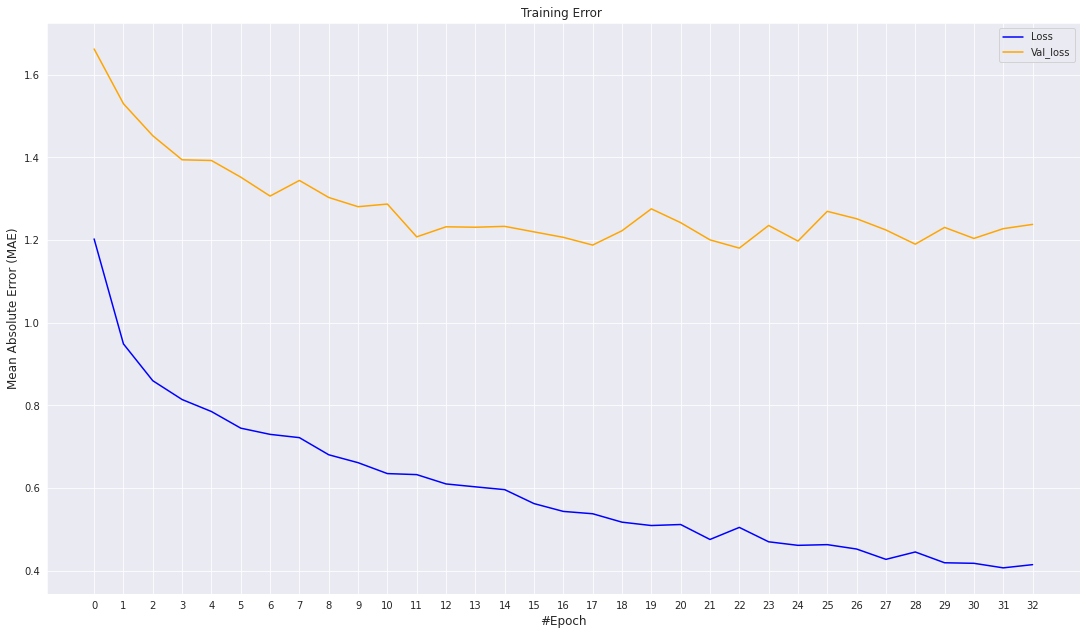

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.237817645072937'

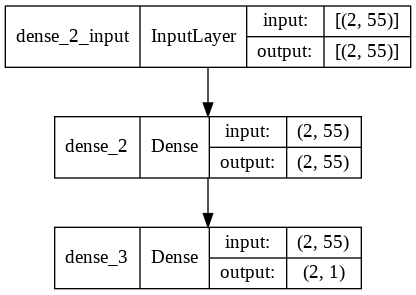

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(55, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

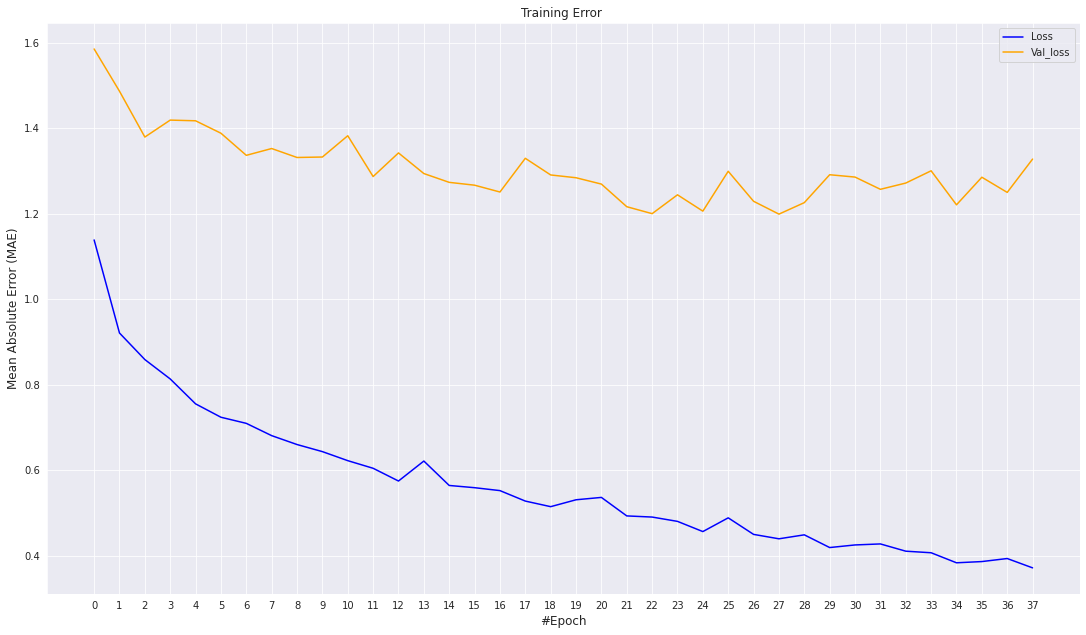

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.3274444341659546'

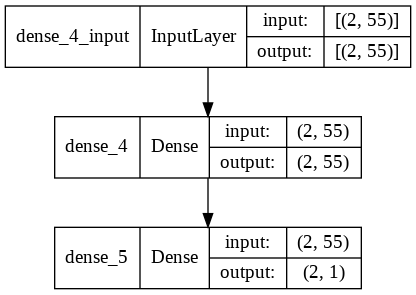

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Two denses model experiments

In [ ]:
model = seq()
model.add(Dense(55, activation = 'relu'))
model.add(Dense(27, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

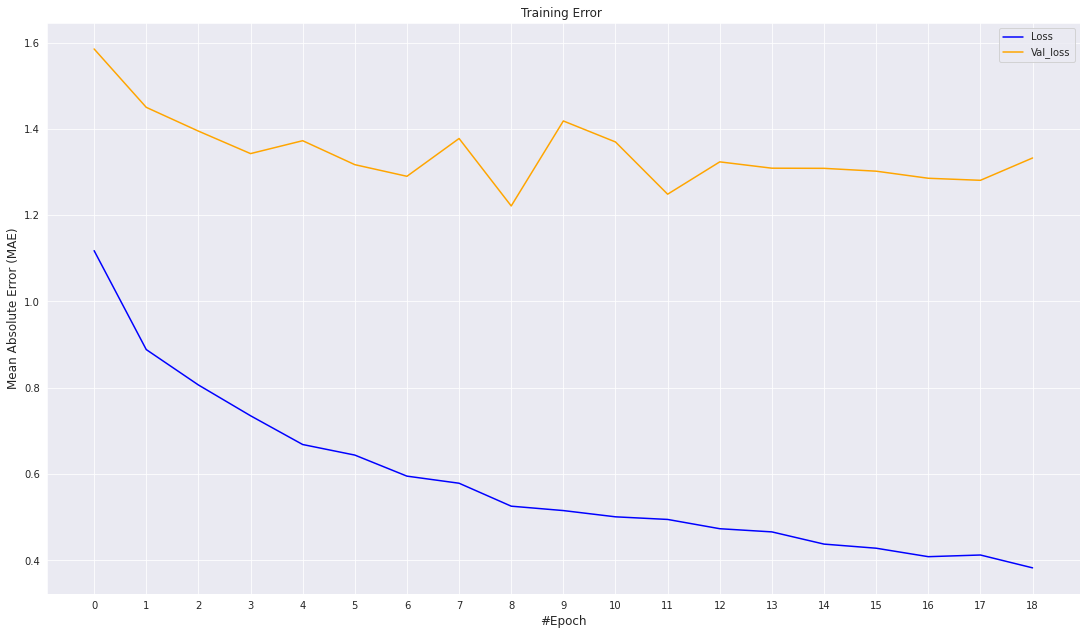

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.332536220550537'

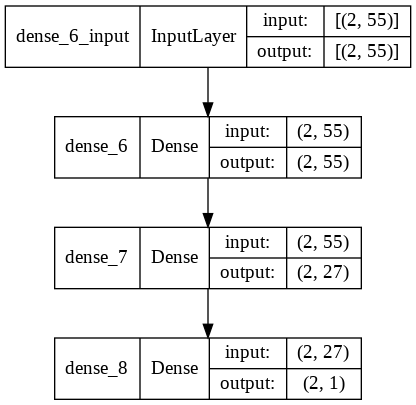

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(55, activation = 'relu'))
model.add(Dense(27, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

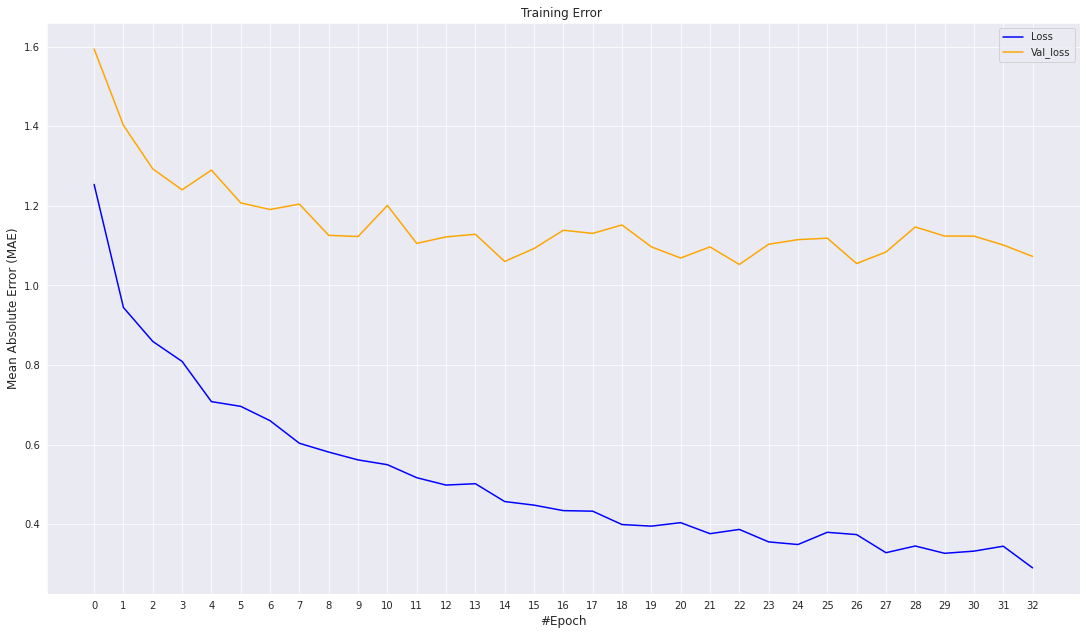

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.0727533102035522'

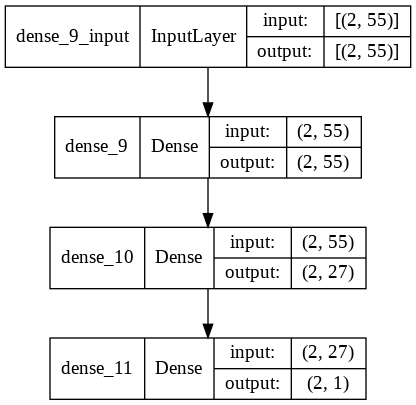

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Three denses model experiments

In [ ]:
model = seq()
model.add(Dense(55, activation = 'relu'))
model.add(Dense(27, activation = 'relu'))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

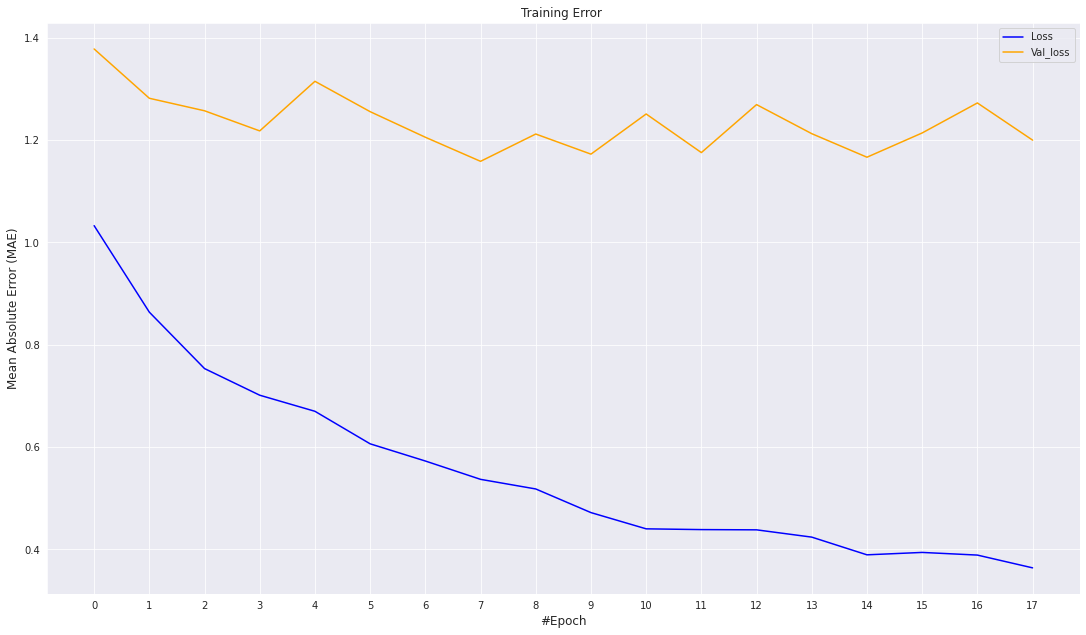

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.199981451034546'

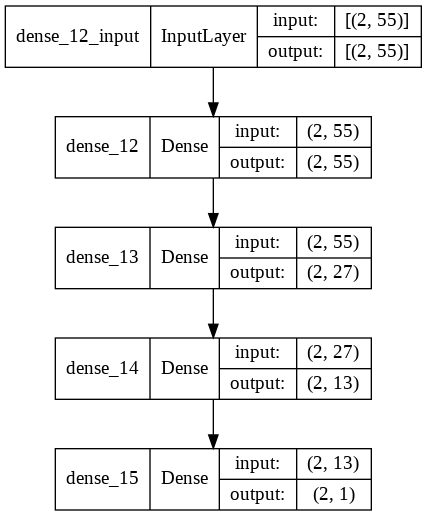

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(55, activation = 'relu'))
model.add(Dense(27, activation = 'relu'))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

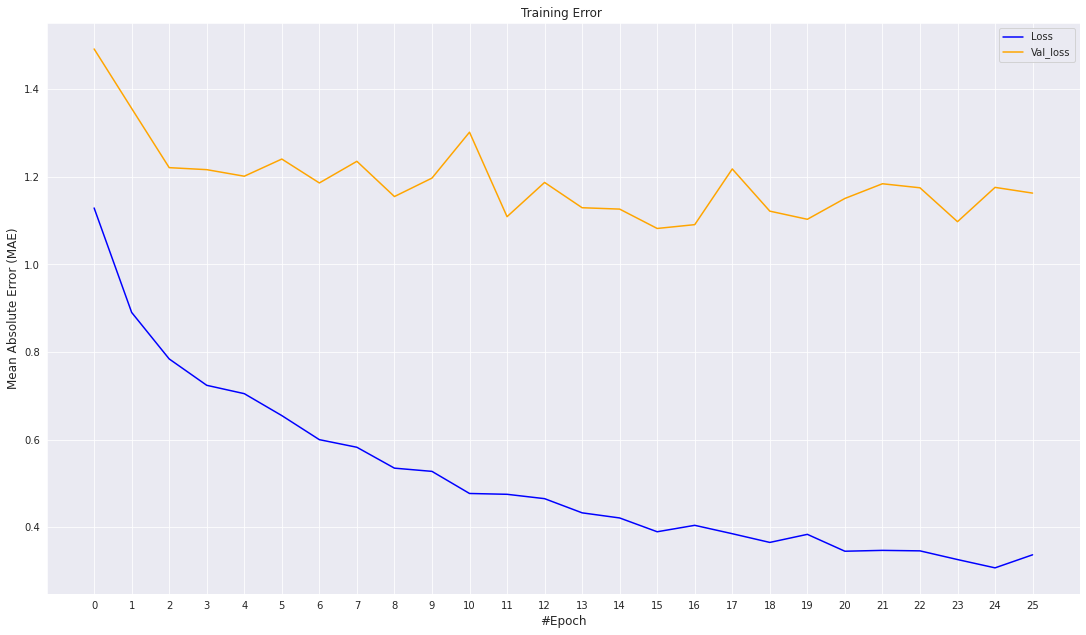

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.1628042459487915'

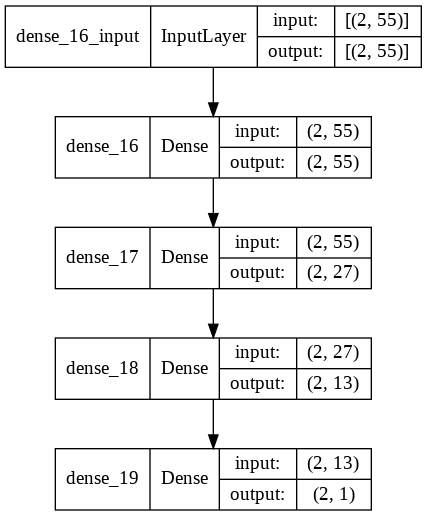

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Four denses model experiments

In [ ]:
model = seq()
model.add(Dense(55, activation = 'relu'))
model.add(Dense(27, activation = 'relu'))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

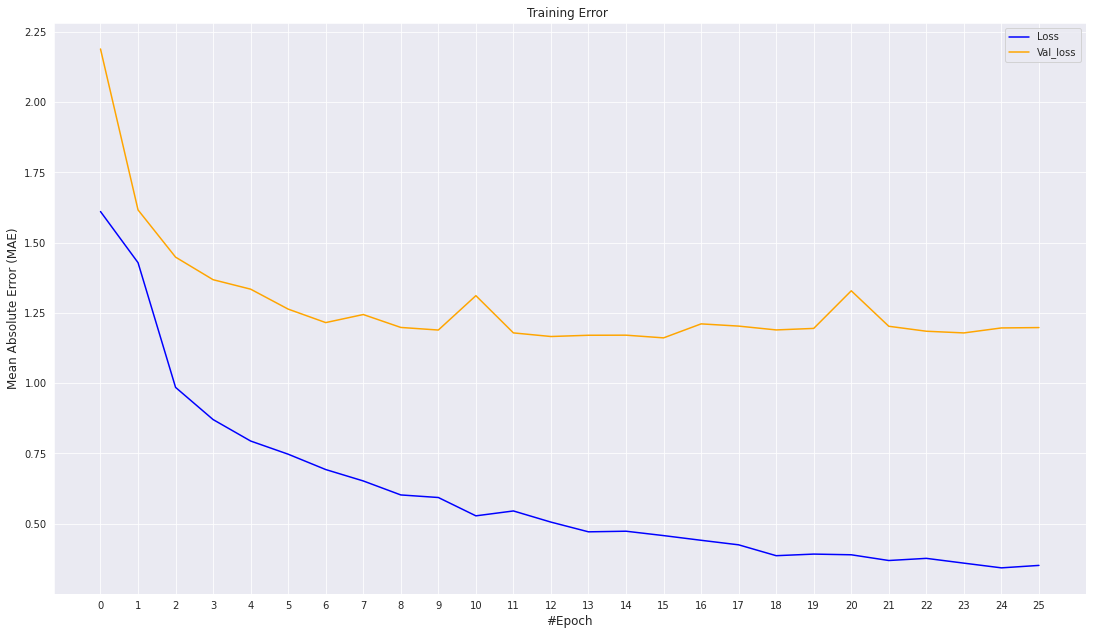

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.1977685689926147'

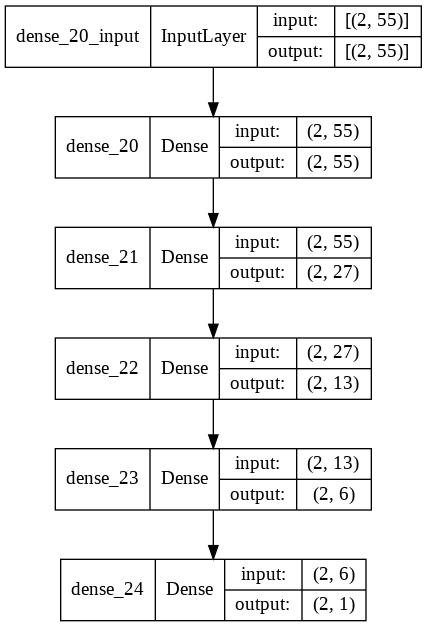

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(55, activation = 'relu'))
model.add(Dense(27, activation = 'relu'))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

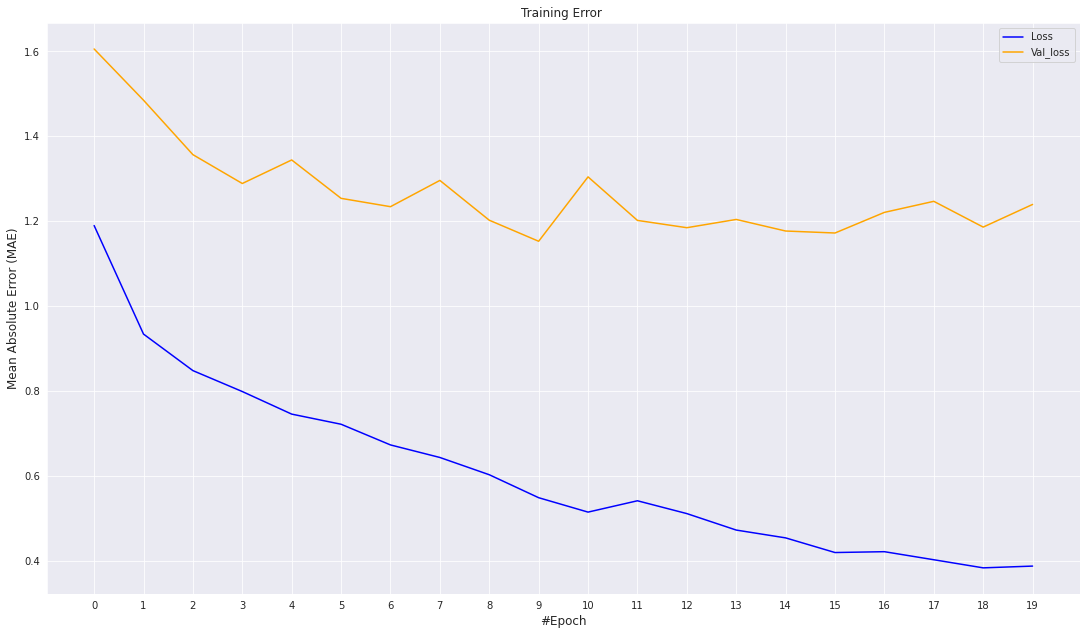

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.2393442392349243'

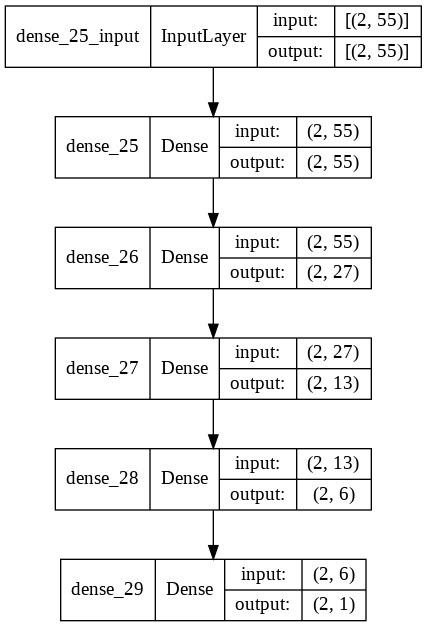

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Exploratory regression experiments with extended dataset after feature extraction using PCA


In [ ]:
X = extended_runs_with_selected_columns.drop(columns=['Total waste percentage'])
y = extended_runs_with_selected_columns['Total waste percentage']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
x_principalComponents = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_principalComponents, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[15:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
7  Polynomial regression 2nd degree  ...             0.000002
4             RandomForestRegressor  ...             0.000217
6                    XGBRFRegressor  ...             0.000006
8  Polynomial regression 3nd degree  ...             0.000003
5             DecisionTreeRegressor  ...             0.000003
2                        ElasticNet  ...             0.000004
3                     BayesianRidge  ...             0.000002
0                 Linear regression  ...             0.000004
1                     SGD regressor  ...             0.000003

[9 rows x 5 columns]

In [ ]:
results = test_regression_models_with_K_Fold_Validation(x_principalComponents, y)

In [ ]:
results

Model name  Mean absolute error
6                    XGBRFRegressor         1.286613e+00
4             RandomForestRegressor         1.287721e+00
7  Polynomial regression 2nd degree         1.416860e+00
8  Polynomial regression 3nd degree         1.526140e+00
2                        ElasticNet         1.533929e+00
3                     BayesianRidge         1.533930e+00
0                 Linear regression         1.533931e+00
5             DecisionTreeRegressor         1.638098e+00
1                     SGD regressor         3.824950e+20

### Pass input from MinMaxScaler

In [ ]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x_principalComponents)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[15:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
7  Polynomial regression 2nd degree  ...             0.000002
4             RandomForestRegressor  ...             0.000197
6                    XGBRFRegressor  ...             0.000007
8  Polynomial regression 3nd degree  ...             0.000003
5             DecisionTreeRegressor  ...             0.000002
1                     SGD regressor  ...             0.000004
3                     BayesianRidge  ...             0.000002
0                 Linear regression  ...             0.000004
2                        ElasticNet  ...             0.000003

[9 rows x 5 columns]

In [ ]:
results = test_regression_models_with_K_Fold_Validation(x_scaled, y)

In [ ]:
results

Model name  Mean absolute error
4             RandomForestRegressor             1.282844
6                    XGBRFRegressor             1.286613
7  Polynomial regression 2nd degree             1.416860
1                     SGD regressor             1.450061
3                     BayesianRidge             1.509752
8  Polynomial regression 3nd degree             1.525573
0                 Linear regression             1.533931
2                        ElasticNet             1.611137
5             DecisionTreeRegressor             1.617252

### Pass input from StandardScaler

In [ ]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(x_principalComponents)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_standarized, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[15:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
7  Polynomial regression 2nd degree  ...             0.000002
4             RandomForestRegressor  ...             0.000187
6                    XGBRFRegressor  ...             0.000008
5             DecisionTreeRegressor  ...             0.000002
8  Polynomial regression 3nd degree  ...             0.000003
3                     BayesianRidge  ...             0.000002
2                        ElasticNet  ...             0.000003
0                 Linear regression  ...             0.000003
1                     SGD regressor  ...             0.000003

[9 rows x 5 columns]

In [ ]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [ ]:
results

Model name  Mean absolute error
6                    XGBRFRegressor             1.286613
4             RandomForestRegressor             1.299549
7  Polynomial regression 2nd degree             1.416860
3                     BayesianRidge             1.509967
2                        ElasticNet             1.510910
8  Polynomial regression 3nd degree             1.525573
1                     SGD regressor             1.532057
0                 Linear regression             1.533931
5             DecisionTreeRegressor             1.658020

## Model tuning

### Bayesian ridge regressor tuning

In [ ]:
random_grid = {"n_iter": np.arange(100, 10000, 100),
                      "alpha_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "alpha_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 1e-09,
 'alpha_2': 0.1,
 'fit_intercept': True,
 'lambda_1': 0.1,
 'lambda_2': 1e-05,
 'n_iter': 9100,
 'normalize': True}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 1e-09, alpha_2 = 0.1, lambda_1 = 0.1, lambda_2 = 1e-05, n_iter = 9100, fit_intercept=True, normalize=True)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :1.509'

### Random forest regressor tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =10, min_samples_leaf= 4, min_samples_split = 5 ,n_estimators= 200, max_features='auto')
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :1.251'

### Decision tree regressor tuning

In [ ]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'absolute_error',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'absolute_error', max_depth = 100, max_features= 'sqrt', min_samples_leaf=4, min_samples_split=5, splitter= 'random')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.422'

### Elastic net regressor tuning

In [ ]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'l1_ratio': 0.30000000000000004,
 'max_iter': 1,
 'selection': 'random'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=0.1, l1_ratio=0.3, max_iter = 1, selection= 'random'), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :1.523'

### SGD regressor tuning

In [ ]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'epsilon': 1e-08,
 'l1_ratio': 0.2,
 'learning_rate': 'constant',
 'max_iter': 1100,
 'penalty': 'elasticnet',
 'tol': 1e-07}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.1, l1_ratio=0.2, epsilon=1e-08, learning_rate='constant', max_iter = 1100, penalty= 'elasticnet', tol=1e-07), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :1.509'

# Generalization tests

## Statistical dataset

In [ ]:
ACE = runs['Run number'] <= 750
ACF = (runs['Run number'] > 750) & (runs['Run number'] <= 800)
ADE = (runs['Run number'] > 800) & (runs['Run number'] <= 850)
ADF = (runs['Run number'] > 850) & (runs['Run number'] <= 900)
BCE = (runs['Run number'] > 900) & (runs['Run number'] <= 950)
BDE = (runs['Run number'] > 950) & (runs['Run number'] <= 1000)
BDF = (runs['Run number'] > 1000)

In [ ]:
categories_of_runs = [('ACE', ACE), ('ACF', ACF), ('ADE', ADE), ('ADF', ADF), ('BCE', BCE), ('BDE', BDE), ('BDF', BDF)]

In [ ]:
Dict_results_random_forest = {}
Dict_results_deep_learning = {}

In [ ]:
def get_model():
  model = seq()
  model.add(Dense(6, activation = 'relu'))
  model.add(Dense(3, activation = 'relu'))
  model.add(Dense(1, activation = 'relu'))
  model.compile(loss='mae', optimizer='adam')
  return model;

In [ ]:
for category_name, category in categories_of_runs:
  part_to_train = runs.loc[~category]
  part_to_test = runs.loc[category]
  x_to_train = part_to_train.drop(columns=['Run number', 'Total waste percentage', 'Number of orders'])
  y_to_train = part_to_train['Total waste percentage']
  x_to_test = part_to_test.drop(columns=['Run number', 'Total waste percentage', 'Number of orders'])
  y_to_test = part_to_test['Total waste percentage']
  rf = RandomForestRegressor(max_depth =20, min_samples_leaf= 1, min_samples_split = 2 ,n_estimators= 1000, max_features= 'sqrt')
  rf.fit(x_to_train, y_to_train)
  predicted = rf.predict(x_to_test)
  mae = metrics.mean_absolute_error(y_to_test, predicted)
  Dict_results_random_forest[category_name] = mae
  print(str(category_name) + ': Random forest mae value = ' + str(mae))
  model = get_model()
  x_to_train_split, x_to_test_split, y_to_train_split, y_to_test_split = train_test_split(x_to_train, y_to_train, test_size=0.20, random_state = 0)
  hist = model.fit(x_to_train_split, y_to_train_split, validation_data=(x_to_test_split, y_to_test_split),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])
  predicted_deep_learning = model.predict(x_to_test)
  mae_deep_learning = metrics.mean_absolute_error(y_to_test, predicted_deep_learning)
  Dict_results_deep_learning[category_name] = mae_deep_learning
  print(str(category_name) + ': Deep learning mae value = ' + str(mae_deep_learning))

ACERandom forest mae value = 1.082560478374055
ACEDeep learning mae value = 2.3218691091979995
ACFRandom forest mae value = 1.3695618672046592
ACFDeep learning mae value = 2.8166539116999996
ADERandom forest mae value = 0.8123680313105105
ADEDeep learning mae value = 1.3568200805099997
ADFRandom forest mae value = 1.9445258367668163
ADFDeep learning mae value = 3.927924883173211
BCERandom forest mae value = 0.4445692761647039
BCEDeep learning mae value = 0.6329412822639999
BDERandom forest mae value = 0.442834043199408
BDEDeep learning mae value = 0.572799902088
BDFRandom forest mae value = 0.5219694191663569
BDFDeep learning mae value = 0.601505531924


In [ ]:
for category_name, category in categories_of_runs:
  part_to_train = runs.loc[~category]
  part_to_test = runs.loc[category]
  x_to_train = part_to_train.drop(columns=['Run number', 'Total waste percentage', 'Number of orders'])
  # Prepare scaler
  standardScaler = preprocessing.StandardScaler()
  standardScaler.fit(x_to_train)

  x_to_train_standarized = standardScaler.transform(x_to_train)
  y_to_train = part_to_train['Total waste percentage']

  x_to_test = part_to_test.drop(columns=['Run number', 'Total waste percentage', 'Number of orders'])
  y_to_test = part_to_test['Total waste percentage']
  x_to_test_standarized = standardScaler.transform(x_to_test)

  rf = RandomForestRegressor(max_depth =20, min_samples_leaf= 1, min_samples_split = 2 ,n_estimators= 1000, max_features= 'sqrt')
  rf.fit(x_to_train_standarized, y_to_train)
  predicted = rf.predict(x_to_test_standarized)
  mae = metrics.mean_absolute_error(y_to_test, predicted)
  Dict_results_random_forest[category_name] = mae
  print(str(category_name) + ': Random forest mae value = ' + str(mae))
  model = get_model()
  x_to_train_split, x_to_test_split, y_to_train_split, y_to_test_split = train_test_split(x_to_train_standarized, y_to_train, test_size=0.20, random_state = 0)
  hist = model.fit(x_to_train_split, y_to_train_split, validation_data=(x_to_test_split, y_to_test_split),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])
  predicted_deep_learning = model.predict(x_to_test_standarized)
  mae_deep_learning = metrics.mean_absolute_error(y_to_test, predicted_deep_learning)
  Dict_results_deep_learning[category_name] = mae_deep_learning
  print(str(category_name) + ': Deep learning mae value = ' + str(mae_deep_learning))

ACE: Random forest mae value = 1.106340962614472
ACE: Deep learning mae value = 1.151468138813692
ACF: Random forest mae value = 1.368873464672236
ACF: Deep learning mae value = 1.4654161793301657
ADE: Random forest mae value = 0.8130007730927545
ADE: Deep learning mae value = 1.098596218658797
ADF: Random forest mae value = 1.880451850748396
ADF: Deep learning mae value = 3.7837087994000003
BCE: Random forest mae value = 0.4460626398218333
BCE: Deep learning mae value = 0.45005722076415483
BDE: Random forest mae value = 0.4380485140640858
BDE: Deep learning mae value = 0.40227106918341093
BDF: Random forest mae value = 0.521270679838242
BDF: Deep learning mae value = 0.4294352188943328


## Extended dataset

In [ ]:
extended_runs = extended_runs.drop(columns=['Min width 1', 'Min width 2', 'Min width 3',
       'Min width 4', 'Min width 5', 'Min width 6', 'Min width 7',
       'Min width 8', 'Min width 9', 'Min width 10', 'Max width 1',
       'Max width 2', 'Max width 3', 'Max width 4', 'Max width 5',
       'Max width 6', 'Max width 7', 'Max width 8', 'Max width 9',
       'Max width 10'])

In [ ]:
ACE = extended_runs['Run number'] <= 750
ACF = (extended_runs['Run number'] > 750) & (extended_runs['Run number'] <= 800)
ADE = (extended_runs['Run number'] > 800) & (extended_runs['Run number'] <= 850)
ADF = (extended_runs['Run number'] > 850) & (extended_runs['Run number'] <= 900)
BCE = (extended_runs['Run number'] > 900) & (extended_runs['Run number'] <= 950)
BDE = (extended_runs['Run number'] > 950) & (extended_runs['Run number'] <= 1000)
BDF = (extended_runs['Run number'] > 1000)

In [ ]:
extended_runs

Run number  Max width  ...  Average reel width 10  Total waste percentage
0           701       4300  ...                    0.0                1.253918
1           702       4900  ...                    0.0                2.303394
2           703       4600  ...                    0.0                0.751089
3           704       4900  ...                    0.0                0.086580
4           705       5000  ...                    0.0                6.347962
..          ...        ...  ...                    ...                     ...
345        1046       4900  ...                    0.0                0.483746
346        1047       5000  ...                    0.0                1.234568
347        1048       5000  ...                    0.0                0.943396
348        1049       5000  ...                    0.0                0.311526
349        1050       4900  ...                    0.0                0.686872

[350 rows x 57 columns]

In [ ]:
for category_name, category in categories_of_runs:
  part_to_train = extended_runs.loc[~category]
  part_to_test = extended_runs.loc[category]
  x_to_train = part_to_train.drop(columns=['Run number', 'Total waste percentage'])
  y_to_train = part_to_train['Total waste percentage']
  x_to_test = part_to_test.drop(columns=['Run number', 'Total waste percentage'])
  y_to_test = part_to_test['Total waste percentage']
  rf = RandomForestRegressor(max_depth =80, min_samples_leaf= 4, min_samples_split = 5 ,n_estimators= 200)
  rf.fit(x_to_train, y_to_train)
  predicted = rf.predict(x_to_test)
  mae = metrics.mean_absolute_error(y_to_test, predicted)
  Dict_results_random_forest[category_name] = mae
  print(str(category_name) + ': Random forest mae value = ' + str(mae))

ACE: Random forest mae value = 0.977802894471893
ACF: Random forest mae value = 1.0767392103215563
ADE: Random forest mae value = 0.8155453966774637
ADF: Random forest mae value = 0.49428414084107325
BCE: Random forest mae value = 0.7985973557793205
BDE: Random forest mae value = 1.0978940828460837
BDF: Random forest mae value = 0.9911517806825997


In [ ]:
for category_name, category in categories_of_runs:
  part_to_train = extended_runs.loc[~category]
  part_to_test = extended_runs.loc[category]
  x_to_train = part_to_train.drop(columns=['Run number', 'Total waste percentage'])
  # Prepare scaler
  standardScaler = preprocessing.StandardScaler()
  standardScaler.fit(x_to_train)

  x_to_train_standarized = standardScaler.transform(x_to_train)
  y_to_train = part_to_train['Total waste percentage']

  x_to_test = part_to_test.drop(columns=['Run number', 'Total waste percentage'])
  y_to_test = part_to_test['Total waste percentage']
  x_to_test_standarized = standardScaler.transform(x_to_test)

  rf = RandomForestRegressor(max_depth =80, min_samples_leaf= 4, min_samples_split = 5 ,n_estimators= 200)
  rf.fit(x_to_train_standarized, y_to_train)
  predicted = rf.predict(x_to_test_standarized)
  mae = metrics.mean_absolute_error(y_to_test, predicted)
  Dict_results_random_forest[category_name] = mae
  print(str(category_name) + ': Random forest mae value = ' + str(mae))

ACE: Random forest mae value = 0.9628823553292492
ACF: Random forest mae value = 1.0795253418553268
ADE: Random forest mae value = 0.7966692490244227
ADF: Random forest mae value = 0.5081243958201087
BCE: Random forest mae value = 0.8073848093567945
BDE: Random forest mae value = 1.117706389358796
BDF: Random forest mae value = 0.9831495158859274
